# EDA on Sentiment Data


Analyse statement by Loughran and McDonald dictionary

In [1]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.WARNING)
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("evironment varialbles:")
eKonf.print(eKonf.env().dict())

version: 0.1.33+29.g7ba4778.dirty
is notebook? True
is colab? False
evironment varialbles:
{'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'NUM_WORKERS': 230}


In [2]:
start_year = 1999
data_dir = "../data/fomc"
eKonf.env().FRED_API_KEY

pydantic.types.SecretStr

## Load datasets

In [3]:
tone_data_lm = eKonf.load_data('fomc_tone_data_lm.parquet', data_dir)
tone_data_lm

polarity_mean_beigebook  polarity_mean_meeting_script  \
date                                                                
1990-02-07                      NaN                     -0.087583   
1990-03-27                      NaN                     -0.171992   
1990-05-15                      NaN                     -0.116052   
1990-07-03                      NaN                     -0.114829   
1990-08-21                      NaN                     -0.209552   
...                             ...                           ...   
2021-11-30                      NaN                           NaN   
2021-12-01                -0.046022                           NaN   
2021-12-02                      NaN                           NaN   
2021-12-15                      NaN                           NaN   
2021-12-17                      NaN                           NaN   

            polarity_mean_minutes  polarity_mean_press_conf  \
date                                                          
1990-02-07                    NaN                       NaN   
1990-03-27                    NaN                       NaN   
1990-05-15                    NaN                       NaN   
1990-07-03                    NaN                       NaN   
1990-08-21                    NaN                       NaN   
...                           ...                       ...   
2021-11-30                    NaN                       NaN   
2021-12-01                    NaN                       NaN   
2021-12-02                    NaN                       NaN   
2021-12-15              -0.043929                 -0.075441   
2021-12-17                    NaN                       NaN   

            polarity_mean_speech  polarity_mean_statement  \
date                                                        
1990-02-07                   NaN                      NaN   
1990-03-27                   NaN                      NaN   
1990-05-15                   NaN                      NaN   
1990-07-03                   NaN                      NaN   
1990-08-21                   NaN                      NaN   
...                          ...                      ...   
2021-11-30             -0.167014                      NaN   
2021-12-01                   NaN                      NaN   
2021-12-02             -0.077381                      NaN   
2021-12-15                   NaN                 0.166667   
2021-12-17             -0.356613                      NaN   

            polarity_mean_testimony  polarity_diffusion_beigebook  \
date                                                                
1990-02-07                      NaN                           NaN   
1990-03-27                      NaN                           NaN   
1990-05-15                      NaN                           NaN   
1990-07-03                      NaN                           NaN   
1990-08-21                      NaN                           NaN   
...                             ...                           ...   
2021-11-30                    -0.12                           NaN   
2021-12-01                      NaN                     -0.048109   
2021-12-02                      NaN                           NaN   
2021-12-15                      NaN                           NaN   
2021-12-17                      NaN                           NaN   

            polarity_diffusion_meeting_script  polarity_diffusion_minutes  \
date                                                                        
1990-02-07                          -0.095663                         NaN   
1990-03-27                          -0.179702                         NaN   
1990-05-15                          -0.125461                         NaN   
1990-07-03                          -0.117794                         NaN   
1990-08-21                          -0.219403                         NaN   
...                                       ...                  

In [4]:
tone_data_finbert = eKonf.load_data('fomc_tone_data_finbert.parquet', data_dir)

cols = [
    'polarity_mean_minutes', 'polarity_mean_press_conf', 'polarity_mean_speech', 'polarity_mean_statement',
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
]

tone_data_finbert =  tone_data_finbert[cols].copy()
tone_data_finbert.columns = tone_data_finbert.columns.str.replace('polarity', 'finbert')
tone_data_finbert

finbert_mean_minutes  finbert_mean_press_conf  \
date                                                        
1990-02-07                   NaN                      NaN   
1990-03-27                   NaN                      NaN   
1990-05-15                   NaN                      NaN   
1990-07-03                   NaN                      NaN   
1990-08-21                   NaN                      NaN   
...                          ...                      ...   
2021-11-30                   NaN                      NaN   
2021-12-01                   NaN                      NaN   
2021-12-02                   NaN                      NaN   
2021-12-15              0.509806                 0.280516   
2021-12-17                   NaN                      NaN   

            finbert_mean_speech  finbert_mean_statement  \
date                                                      
1990-02-07                  NaN                     NaN   
1990-03-27                  NaN                     NaN   
1990-05-15                  NaN                     NaN   
1990-07-03                  NaN                     NaN   
1990-08-21                  NaN                     NaN   
...                         ...                     ...   
2021-11-30             0.182338                     NaN   
2021-12-01                  NaN                     NaN   
2021-12-02             0.262141                     NaN   
2021-12-15                  NaN                0.412947   
2021-12-17             0.408242                     NaN   

            finbert_diffusion_minutes  finbert_diffusion_press_conf  \
date                                                                  
1990-02-07                        NaN                           NaN   
1990-03-27                        NaN                           NaN   
1990-05-15                        NaN                           NaN   
1990-07-03                        NaN                           NaN   
1990-08-21                        NaN                           NaN   
...                               ...                           ...   
2021-11-30                        NaN                           NaN   
2021-12-01                        NaN                           NaN   
2021-12-02                        NaN                           NaN   
2021-12-15                      0.675                      0.377622   
2021-12-17                        NaN                           NaN   

            finbert_diffusion_speech  finbert_diffusion_statement  
date                                                               
1990-02-07                       NaN                          NaN  
1990-03-27                       NaN                          NaN  
1990-05-15                       NaN                          NaN  
1990-07-03                       NaN                          NaN  
1990-08-21                       NaN                          NaN  
...                              ...                          ...  
2021-11-30                  0.239583                          NaN  
2021-12-01                       NaN                          NaN  
2021-12-02                  0.338889                          NaN  
2021-12-15                       NaN                     0.555556  
2021-12-17                  0.547619                          NaN  

[1876 rows x 8 columns]

In [5]:
tone_data_t5 = eKonf.load_data('fomc_tone_data_t5.parquet', data_dir)

cols = [
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
]

tone_data_t5 =  tone_data_t5[cols].copy()
tone_data_t5.columns = tone_data_t5.columns.str.replace('polarity', 't5')
tone_data_t5


t5_diffusion_minutes  t5_diffusion_press_conf  \
date                                                        
1990-02-07                   NaN                      NaN   
1990-03-27                   NaN                      NaN   
1990-05-15                   NaN                      NaN   
1990-07-03                   NaN                      NaN   
1990-08-21                   NaN                      NaN   
...                          ...                      ...   
2021-11-30                   NaN                      NaN   
2021-12-01                   NaN                      NaN   
2021-12-02                   NaN                      NaN   
2021-12-15              0.403571                 0.216783   
2021-12-17                   NaN                      NaN   

            t5_diffusion_speech  t5_diffusion_statement  
date                                                     
1990-02-07                  NaN                     NaN  
1990-03-27                  NaN                     NaN  
1990-05-15                  NaN                     NaN  
1990-07-03                  NaN                     NaN  
1990-08-21                  NaN                     NaN  
...                         ...                     ...  
2021-11-30             0.239583                     NaN  
2021-12-01                  NaN                     NaN  
2021-12-02             0.250000                     NaN  
2021-12-15                  NaN                0.444444  
2021-12-17             0.174603                     NaN  

[1876 rows x 4 columns]

## Correlation

In [6]:
cfg = eKonf.compose("io/fetcher/fomc")
cfg.output_dir = data_dir
fomc = eKonf.instantiate(cfg)

In [7]:
fomc.load_calendar(from_year=1982, force_download=False)

unscheduled  forecast  confcall        speaker  rate  rate_change  \
date                                                                            
1982-10-05        False     False     False   Paul Volcker  9.50        -0.50   
1982-11-16        False     False     False   Paul Volcker  9.00        -0.50   
1982-12-21        False     False     False   Paul Volcker  8.50         0.00   
1983-01-14        False     False      True   Paul Volcker  8.50         0.00   
1983-01-21        False     False      True   Paul Volcker  8.50         0.00   
...                 ...       ...       ...            ...   ...          ...   
2021-11-03        False     False     False  Jerome Powell  0.25         0.00   
2021-12-15        False      True     False  Jerome Powell  0.25         0.00   
2022-01-26        False     False     False  Jerome Powell  0.25         0.00   
2022-03-16        False      True     False  Jerome Powell  0.50         0.25   
2022-05-04        False     False     False  Jerome Powell  1.00         0.50   

            rate_decision  rate_changed  
date                                     
1982-10-05           -1.0             1  
1982-11-16           -1.0             1  
1982-12-21            0.0             0  
1983-01-14            0.0             0  
1983-01-21            0.0             0  
...                   ...           ...  
2021-11-03            0.0             0  
2021-12-15            0.0             0  
2022-01-26            0.0             0  
2022-03-16            1.0             1  
2022-05-04            1.0             1  

[415 rows x 8 columns]

### Merge with fed rate data

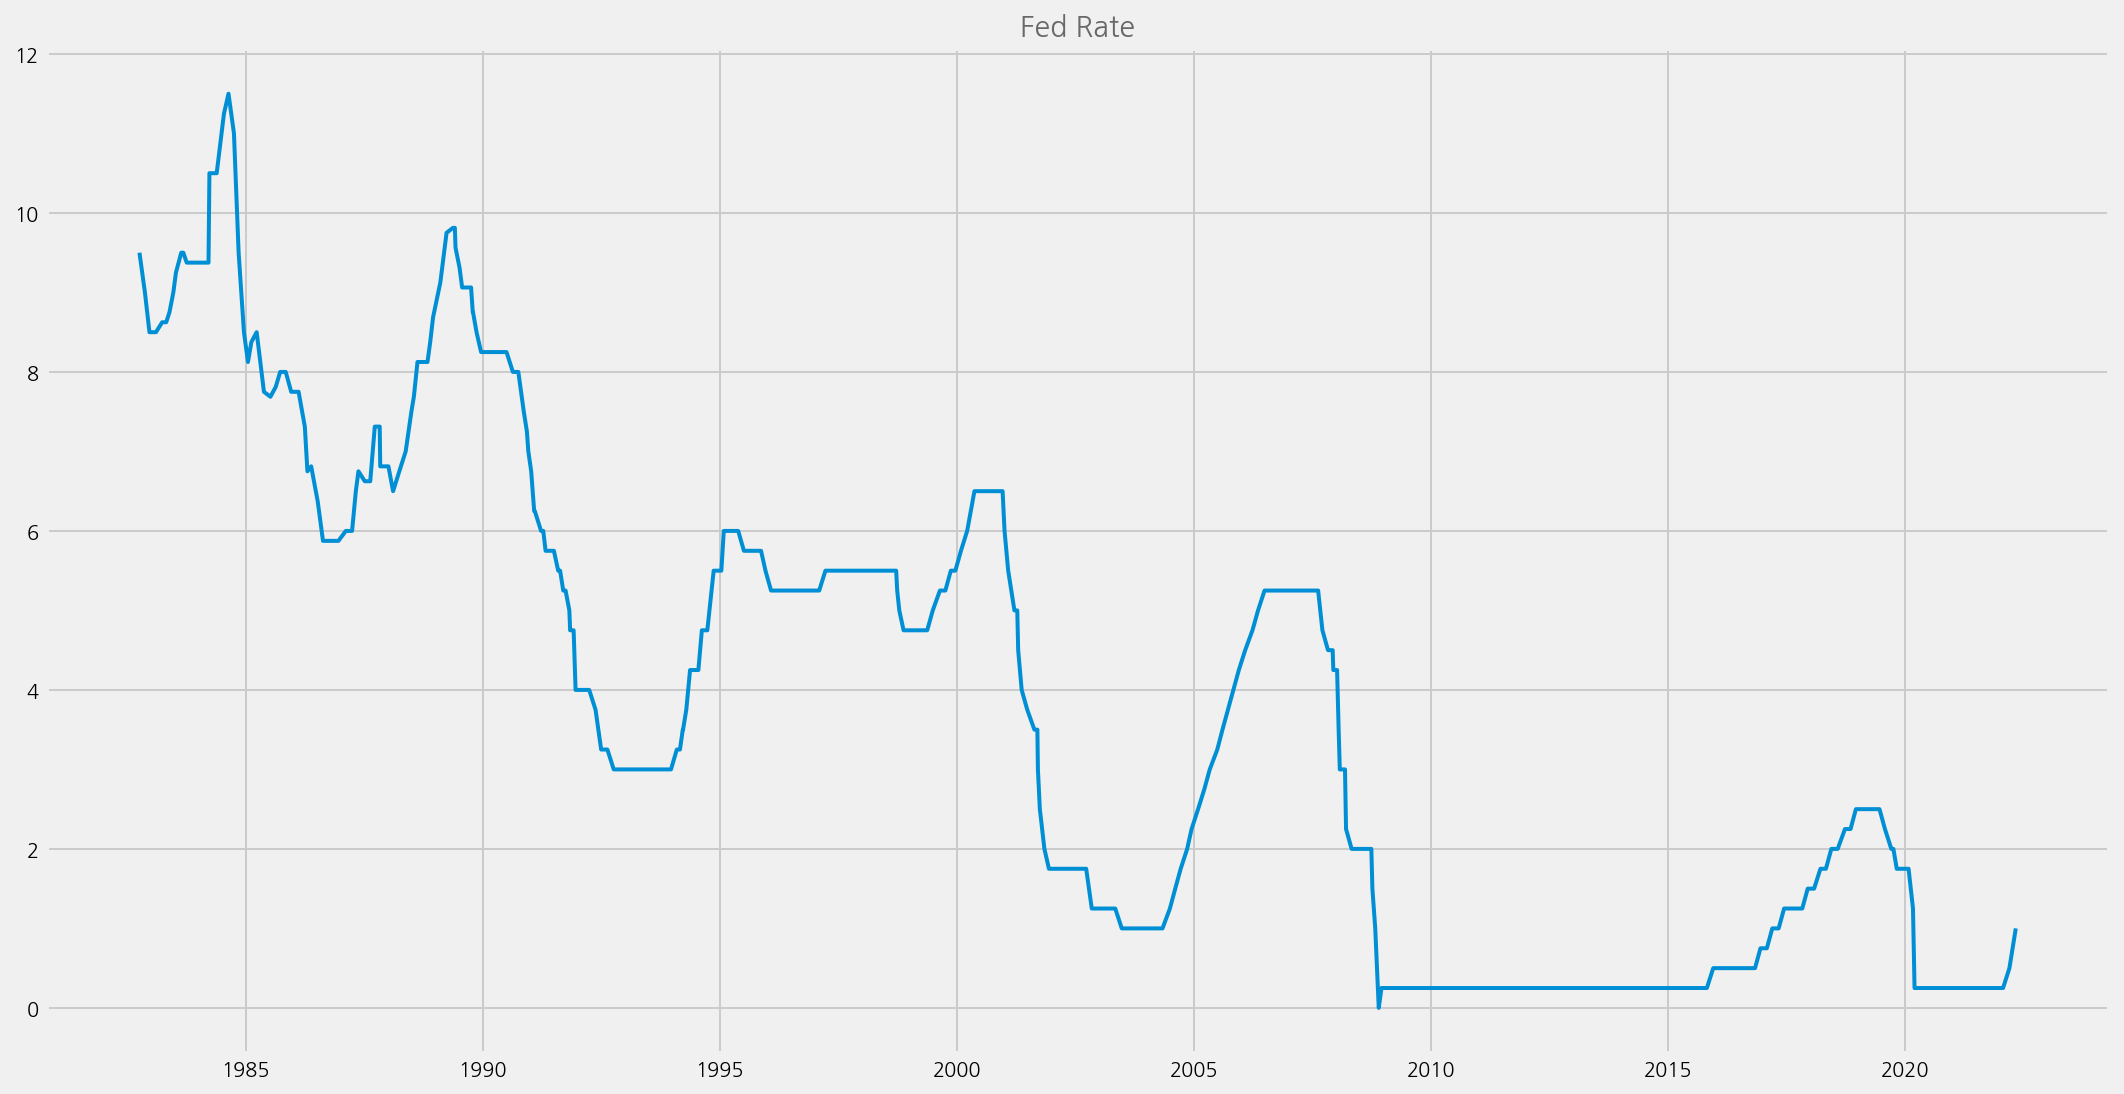

In [8]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = 'rate'
cfg.figure.figsize = (15, 8)
cfg.ax.title = 'Fed Rate'
eKonf.instantiate(cfg, data=fomc.calendar)

In [9]:
tone_data = tone_data_lm.merge(tone_data_finbert, left_index=True, right_index=True)
tone_data = tone_data.merge(tone_data_t5, left_index=True, right_index=True)
tone_data.index.name = 'date'
tone_data = tone_data[tone_data.index.year >= (start_year-1)]
tone_data

polarity_mean_beigebook  polarity_mean_meeting_script  \
date                                                                
1998-01-03                      NaN                           NaN   
1998-01-08                      NaN                           NaN   
1998-01-12                      NaN                           NaN   
1998-01-16                      NaN                           NaN   
1998-01-29                      NaN                           NaN   
...                             ...                           ...   
2021-11-30                      NaN                           NaN   
2021-12-01                -0.046022                           NaN   
2021-12-02                      NaN                           NaN   
2021-12-15                      NaN                           NaN   
2021-12-17                      NaN                           NaN   

            polarity_mean_minutes  polarity_mean_press_conf  \
date                                                          
1998-01-03                    NaN                       NaN   
1998-01-08                    NaN                       NaN   
1998-01-12                    NaN                       NaN   
1998-01-16                    NaN                       NaN   
1998-01-29                    NaN                       NaN   
...                           ...                       ...   
2021-11-30                    NaN                       NaN   
2021-12-01                    NaN                       NaN   
2021-12-02                    NaN                       NaN   
2021-12-15              -0.043929                 -0.075441   
2021-12-17                    NaN                       NaN   

            polarity_mean_speech  polarity_mean_statement  \
date                                                        
1998-01-03             -0.018248                      NaN   
1998-01-08             -0.379629                      NaN   
1998-01-12             -0.030516                      NaN   
1998-01-16             -0.029630                      NaN   
1998-01-29                   NaN                      NaN   
...                          ...                      ...   
2021-11-30             -0.167014                      NaN   
2021-12-01                   NaN                      NaN   
2021-12-02             -0.077381                      NaN   
2021-12-15                   NaN                 0.166667   
2021-12-17             -0.356613                      NaN   

            polarity_mean_testimony  polarity_diffusion_beigebook  \
date                                                                
1998-01-03                      NaN                           NaN   
1998-01-08                      NaN                           NaN   
1998-01-12                      NaN                           NaN   
1998-01-16                      NaN                           NaN   
1998-01-29                -0.376811                           NaN   
...                             ...                           ...   
2021-11-30                -0.120000                           NaN   
2021-12-01                      NaN                     -0.048109   
2021-12-02                      NaN                           NaN   
2021-12-15                      NaN                           NaN   
2021-12-17                      NaN                           NaN   

            polarity_diffusion_meeting_script  polarity_diffusion_minutes  \
date                                                                        
1998-01-03                                NaN                         NaN   
1998-01-08                                NaN                         NaN   
1998-01-12                                NaN                         NaN   
1998-01-16                                NaN                         NaN   
1998-01-29                                NaN                         NaN   
...                                       ...                  

In [10]:
cols = [
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
    'finbert_diffusion_minutes', 'finbert_diffusion_press_conf', 'finbert_diffusion_speech', 'finbert_diffusion_statement',
    't5_diffusion_minutes', 't5_diffusion_press_conf', 't5_diffusion_speech', 't5_diffusion_statement'
]


merged_tone_data = fomc.calendar.copy()

for name in cols:
    offset = dict(months=0, days=1)
    data = tone_data.dropna(subset=[name])
    merged_tone_data = fomc.add_available_latest(
        merged_tone_data, data, name, [name], offset
    )

merged_tone_data = merged_tone_data[(merged_tone_data.index.year >= (start_year-1)) & (merged_tone_data.index.year < 2022)]
eKonf.save_data(merged_tone_data, "fomc_tone_data_merged.parquet", data_dir)
merged_tone_data

100%|██████████| 415/415 [00:00<00:00, 2132.45it/s]


unscheduled  forecast  confcall         speaker  rate  \
date                                                                
1998-02-04        False     False     False  Alan Greenspan  5.50   
1998-03-31        False     False     False  Alan Greenspan  5.50   
1998-05-19        False     False     False  Alan Greenspan  5.50   
1998-07-01        False     False     False  Alan Greenspan  5.50   
1998-08-18        False     False     False  Alan Greenspan  5.50   
...                 ...       ...       ...             ...   ...   
2021-06-16        False      True     False   Jerome Powell  0.25   
2021-07-28        False     False     False   Jerome Powell  0.25   
2021-09-22        False      True     False   Jerome Powell  0.25   
2021-11-03        False     False     False   Jerome Powell  0.25   
2021-12-15        False      True     False   Jerome Powell  0.25   

            rate_change  rate_decision  rate_changed  \
date                                                   
1998-02-04          0.0            0.0             0   
1998-03-31          0.0            0.0             0   
1998-05-19          0.0            0.0             0   
1998-07-01          0.0            0.0             0   
1998-08-18          0.0            0.0             0   
...                 ...            ...           ...   
2021-06-16          0.0            0.0             0   
2021-07-28          0.0            0.0             0   
2021-09-22          0.0            0.0             0   
2021-11-03          0.0            0.0             0   
2021-12-15          0.0            0.0             0   

            polarity_diffusion_minutes polarity_diffusion_minutes_date  ...  \
date                                                                    ...   
1998-02-04                         NaN                             NaT  ...   
1998-03-31                   -0.103139                      1998-02-04  ...   
1998-05-19                   -0.069767                      1998-03-31  ...   
1998-07-01                   -0.233129                      1998-05-19  ...   
1998-08-18                   -0.155172                      1998-07-01  ...   
...                                ...                             ...  ...   
2021-06-16                   -0.040741                      2021-04-28  ...   
2021-07-28                    0.031142                      2021-06-16  ...   
2021-09-22                   -0.069079                      2021-07-28  ...   
2021-11-03                   -0.112403                      2021-09-22  ...   
2021-12-15                   -0.080851                      2021-11-03  ...   

            finbert_diffusion_statement finbert_diffusion_statement_date  \
date                                                                       
1998-02-04                          NaN                              NaT   
1998-03-31                          NaN                              NaT   
1998-05-19                          NaN                              NaT   
1998-07-01                          NaN                              NaT   
1998-08-18                          NaN                              NaT   
...                                 ...                              ...   
2021-06-16                     0.615385                       2021-04-28   
2021-07-28                     0.461538                       2021-06-16   
2021-09-22                     0.538462                       2021-07-28   
2021-11-03                     0.571429                       2021-09-22   
2021-12-15                     0.647059                       2021-11-03   

            t5_diffusion_minutes t5_diffusion_minutes_date  \
date                                                         
1998-02-04                   NaN                       NaT   
1998-03-31              0.367713                1998-02-04   
1998-05-19              0.519380                1998-03-31   
1998-07-01              0.429448                1998-05-19

In [11]:
import numpy as np

tone_columns = {
    'lm': ['polarity_diffusion_minutes', 'polarity_diffusion_speech', 'polarity_diffusion_statement'],
    'finbert': ['finbert_diffusion_minutes', 'finbert_diffusion_speech', 'finbert_diffusion_statement'],
    't5': ['t5_diffusion_minutes', 't5_diffusion_speech', 't5_diffusion_statement']
}

tone_cols = []
for name, cols in tone_columns.items():
    tone_col = name + '_tones'
    tone_cols.append(tone_col)
    merged_tone_data[tone_col] = merged_tone_data[cols].mean(axis=1, skipna=True)

merged_tone_data = merged_tone_data.copy()[merged_tone_data.index.year >= start_year]
eKonf.save_data(merged_tone_data, "fomc_tone_data_merged.parquet", data_dir)
merged_tone_data

unscheduled  forecast  confcall         speaker  rate  \
date                                                                
1999-02-03        False     False     False  Alan Greenspan  4.75   
1999-03-30        False     False     False  Alan Greenspan  4.75   
1999-05-18        False     False     False  Alan Greenspan  4.75   
1999-06-30        False     False     False  Alan Greenspan  5.00   
1999-08-24        False     False     False  Alan Greenspan  5.25   
...                 ...       ...       ...             ...   ...   
2021-06-16        False      True     False   Jerome Powell  0.25   
2021-07-28        False     False     False   Jerome Powell  0.25   
2021-09-22        False      True     False   Jerome Powell  0.25   
2021-11-03        False     False     False   Jerome Powell  0.25   
2021-12-15        False      True     False   Jerome Powell  0.25   

            rate_change  rate_decision  rate_changed  \
date                                                   
1999-02-03         0.00            0.0             0   
1999-03-30         0.00            0.0             0   
1999-05-18         0.00            0.0             0   
1999-06-30         0.25            1.0             1   
1999-08-24         0.25            1.0             1   
...                 ...            ...           ...   
2021-06-16         0.00            0.0             0   
2021-07-28         0.00            0.0             0   
2021-09-22         0.00            0.0             0   
2021-11-03         0.00            0.0             0   
2021-12-15         0.00            0.0             0   

            polarity_diffusion_minutes polarity_diffusion_minutes_date  ...  \
date                                                                    ...   
1999-02-03                   -0.096552                      1998-12-22  ...   
1999-03-30                   -0.072464                      1999-02-03  ...   
1999-05-18                   -0.050360                      1999-03-30  ...   
1999-06-30                   -0.028169                      1999-05-18  ...   
1999-08-24                   -0.059524                      1999-06-30  ...   
...                                ...                             ...  ...   
2021-06-16                   -0.040741                      2021-04-28  ...   
2021-07-28                    0.031142                      2021-06-16  ...   
2021-09-22                   -0.069079                      2021-07-28  ...   
2021-11-03                   -0.112403                      2021-09-22  ...   
2021-12-15                   -0.080851                      2021-11-03  ...   

            t5_diffusion_minutes_date t5_diffusion_press_conf  \
date                                                            
1999-02-03                 1998-12-22                     NaN   
1999-03-30                 1999-02-03                     NaN   
1999-05-18                 1999-03-30                     NaN   
1999-06-30                 1999-05-18                     NaN   
1999-08-24                 1999-06-30                     NaN   
...                               ...                     ...   
2021-06-16                 2021-04-28                0.142012   
2021-07-28                 2021-06-16                0.194737   
2021-09-22                 2021-07-28                0.197674   
2021-11-03                 2021-09-22                0.143695   
2021-12-15                 2021-11-03                0.172619   

            t5_diffusion_press_conf_date t5_diffusion_speech  \
date                                                           
1999-02-03                           NaT            0.111111   
1999-03-30                           NaT            0.187050   
1999-05-18                           NaT            0.245509   
1999-06-30                           NaT            0.097561   
1999-08-24                           NaT            0.178947   
...                                  ...                 ...   

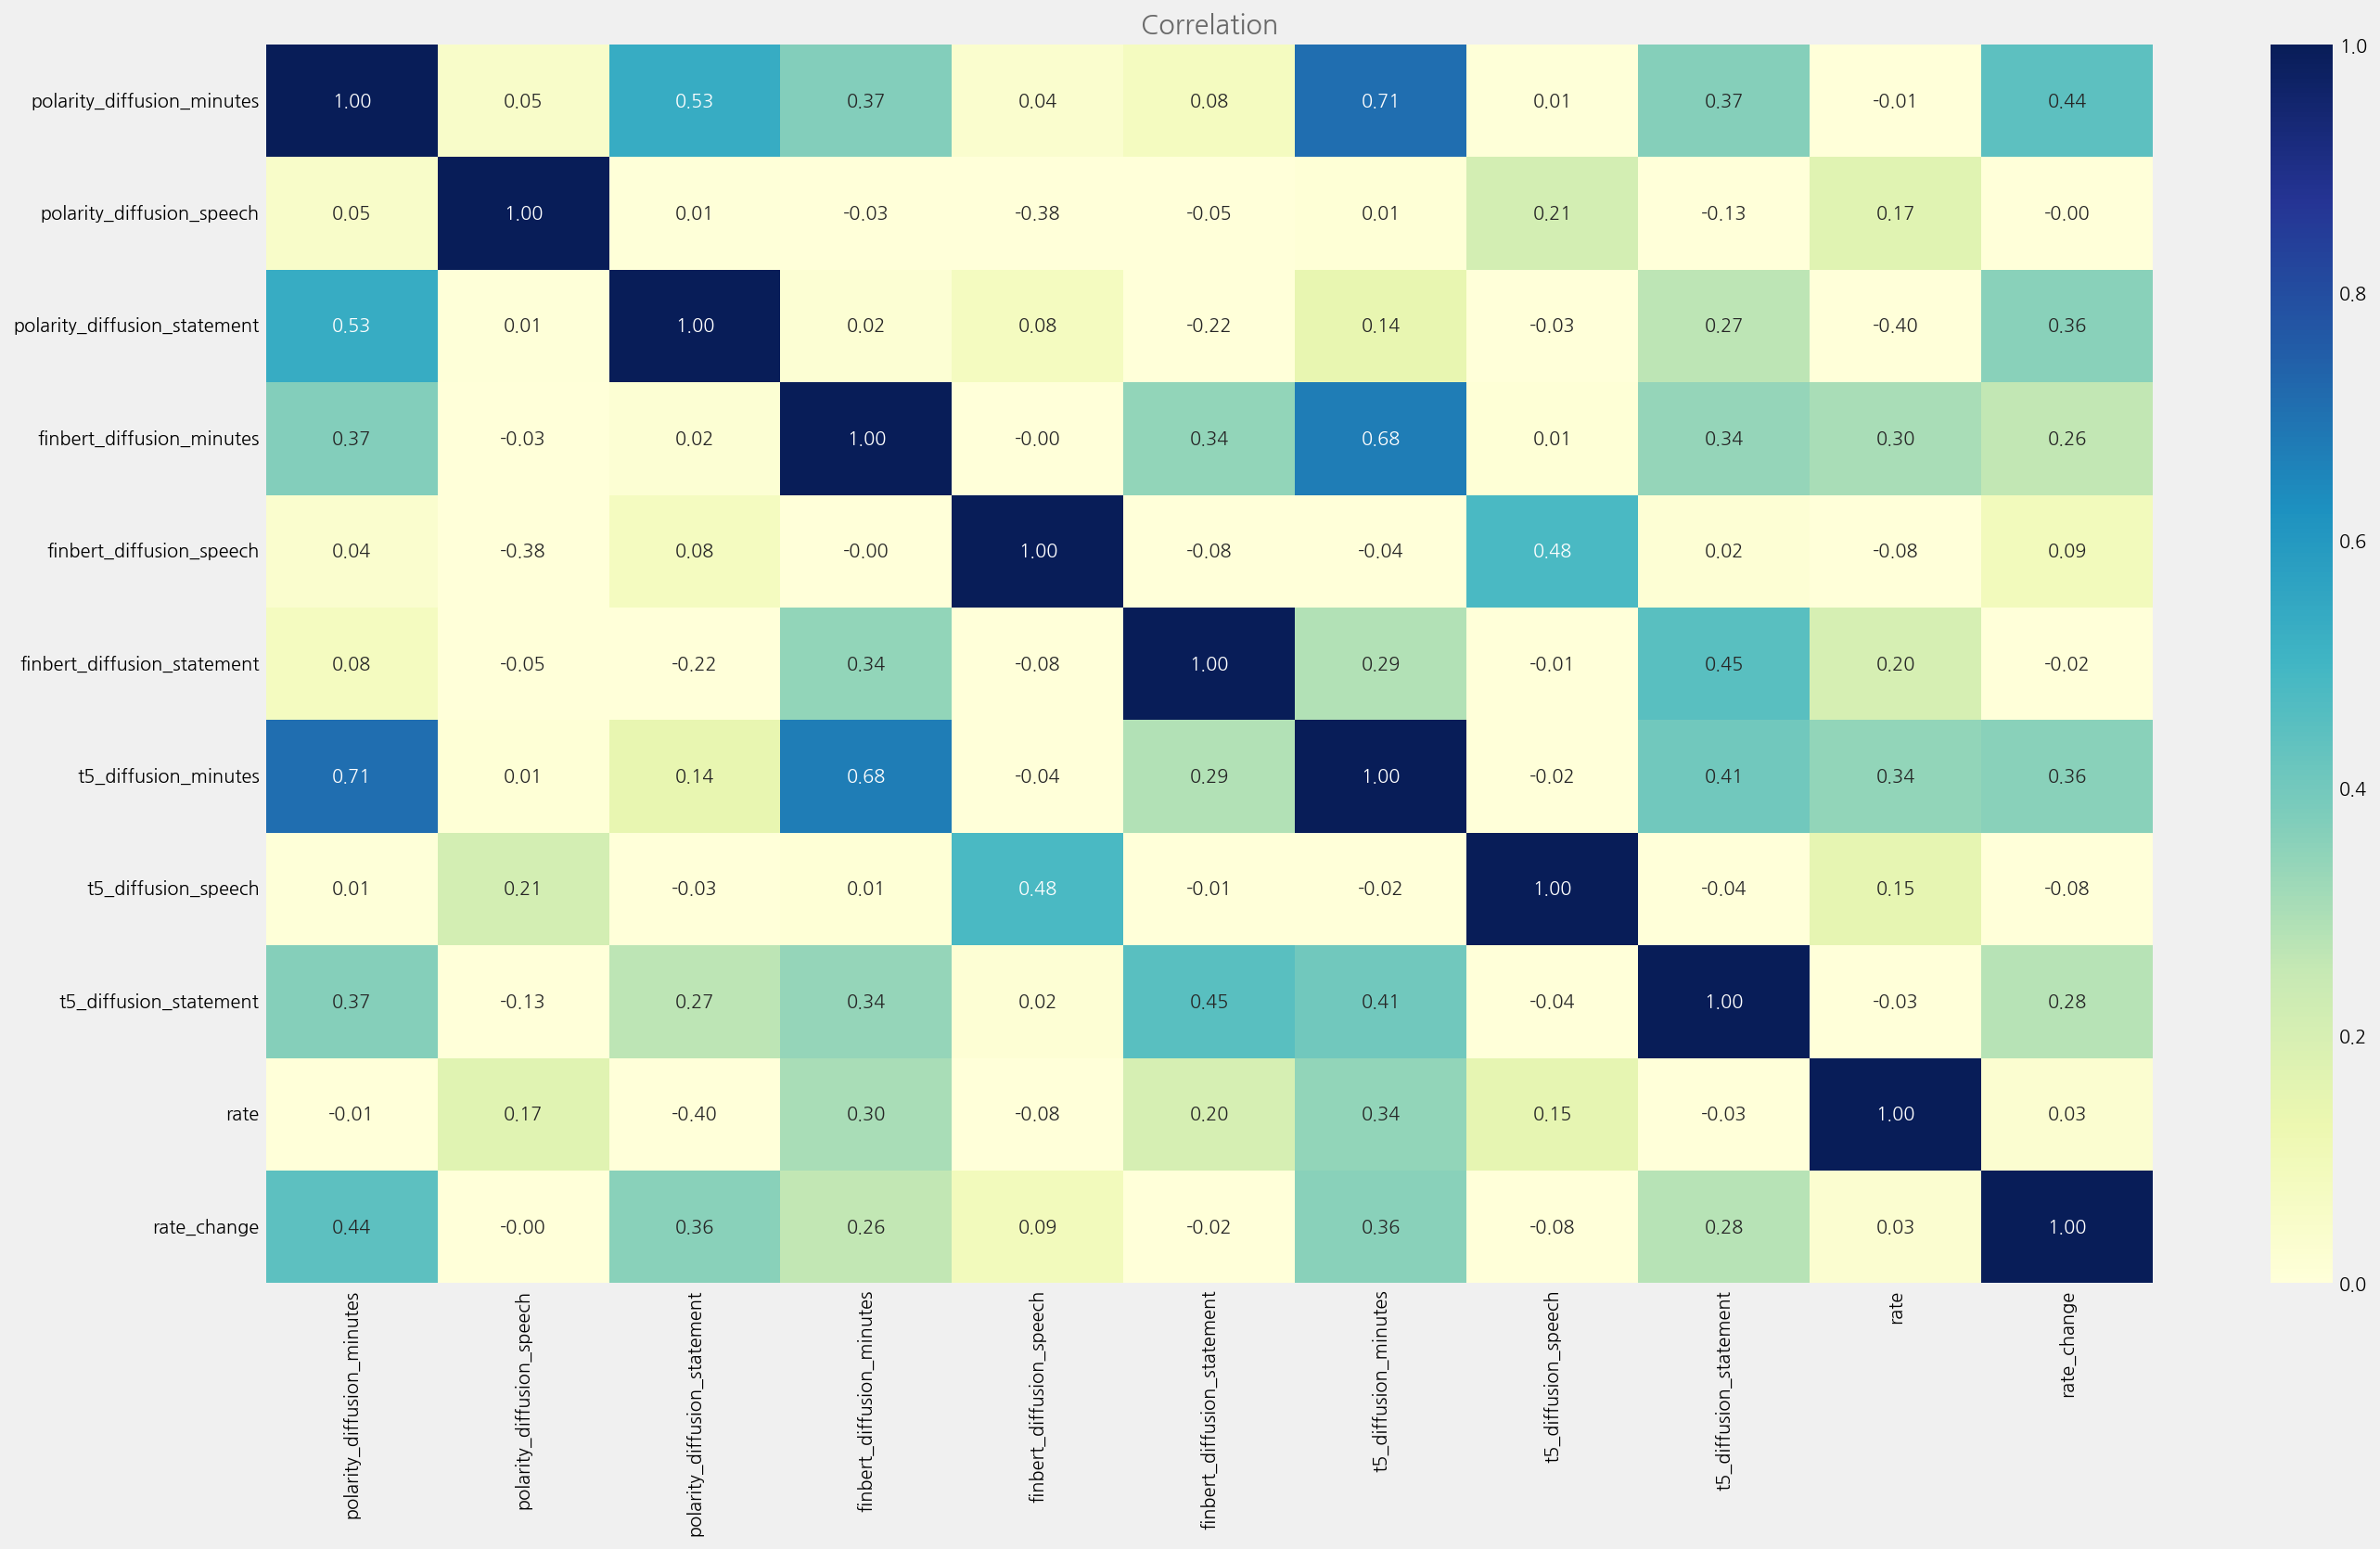

In [12]:
corr_columns = sum(tone_columns.values(), []) + ["rate", "rate_change"]
corr_data = merged_tone_data[corr_columns].astype(float).corr()

cfg = eKonf.compose("visualize/plot=heatmap")
cfg.figure.figsize = (20, 12)
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Correlation"
eKonf.instantiate(cfg, data=corr_data)

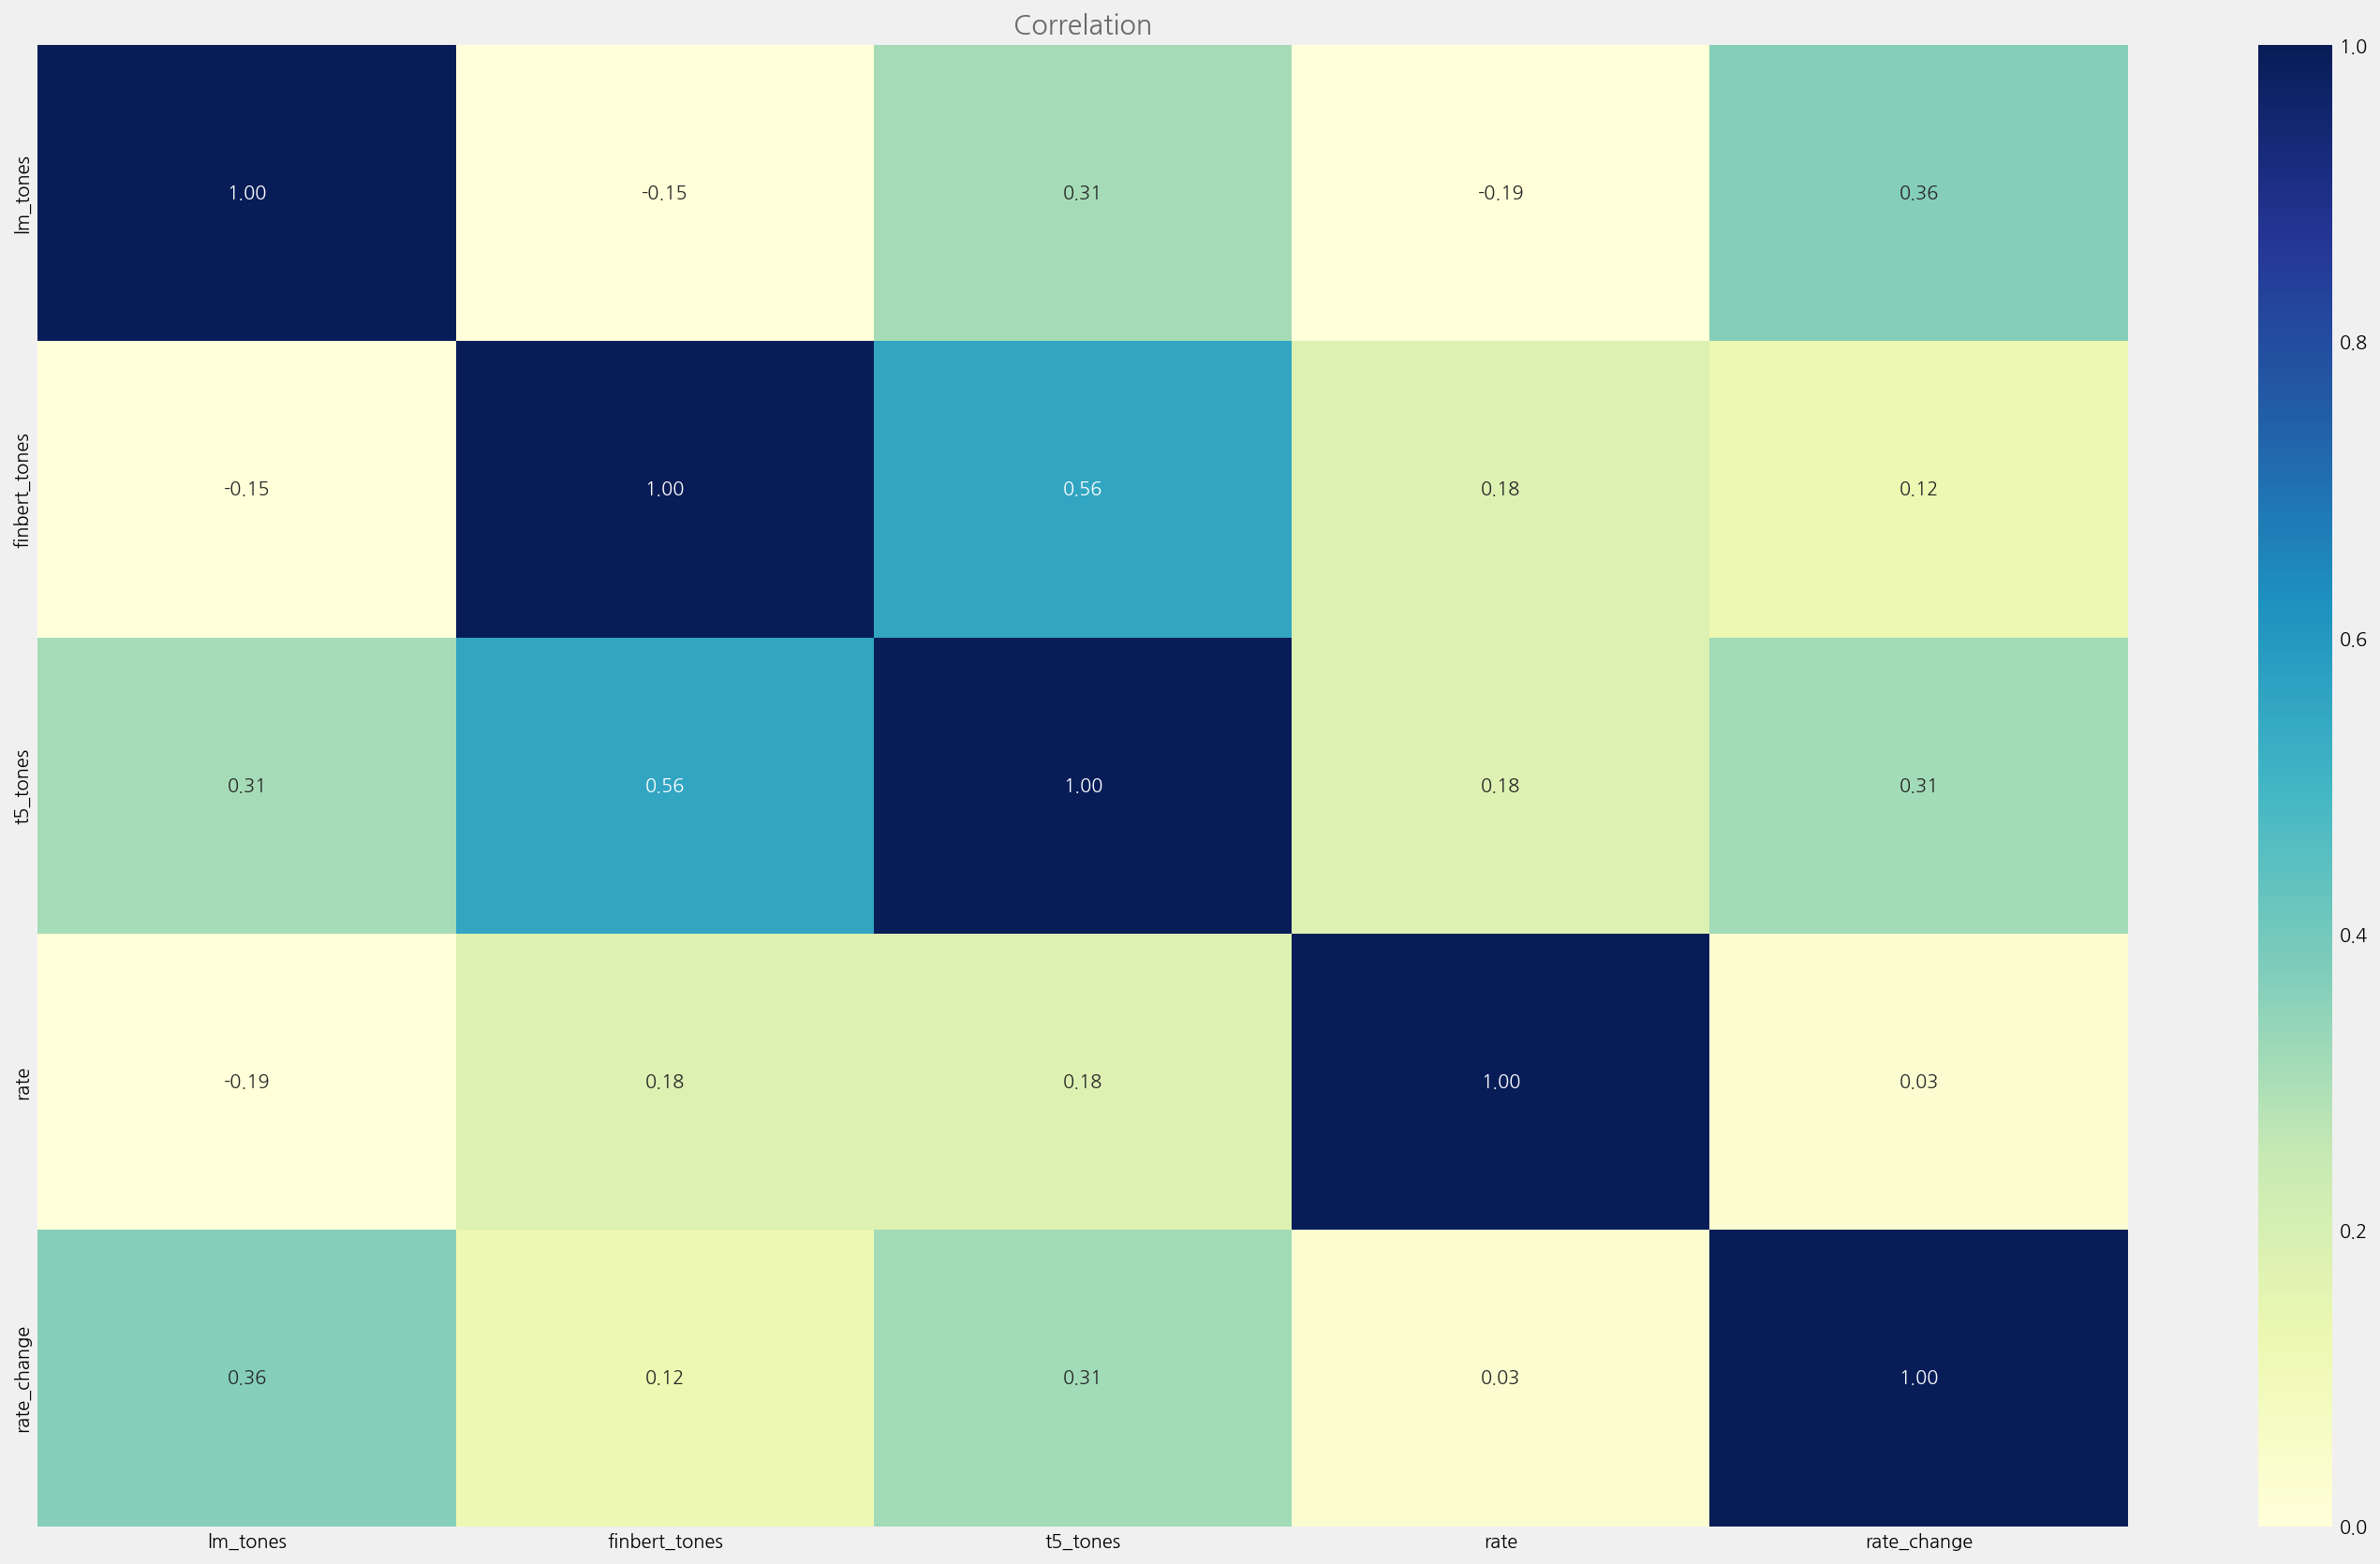

In [13]:
corr_columns = tone_cols + ["rate", "rate_change"]
corr_data = merged_tone_data[corr_columns].astype(float).corr()

cfg = eKonf.compose("visualize/plot=heatmap")
cfg.figure.figsize = (20, 12)
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Correlation"
eKonf.instantiate(cfg, data=corr_data)

## Plot the sentiment scores

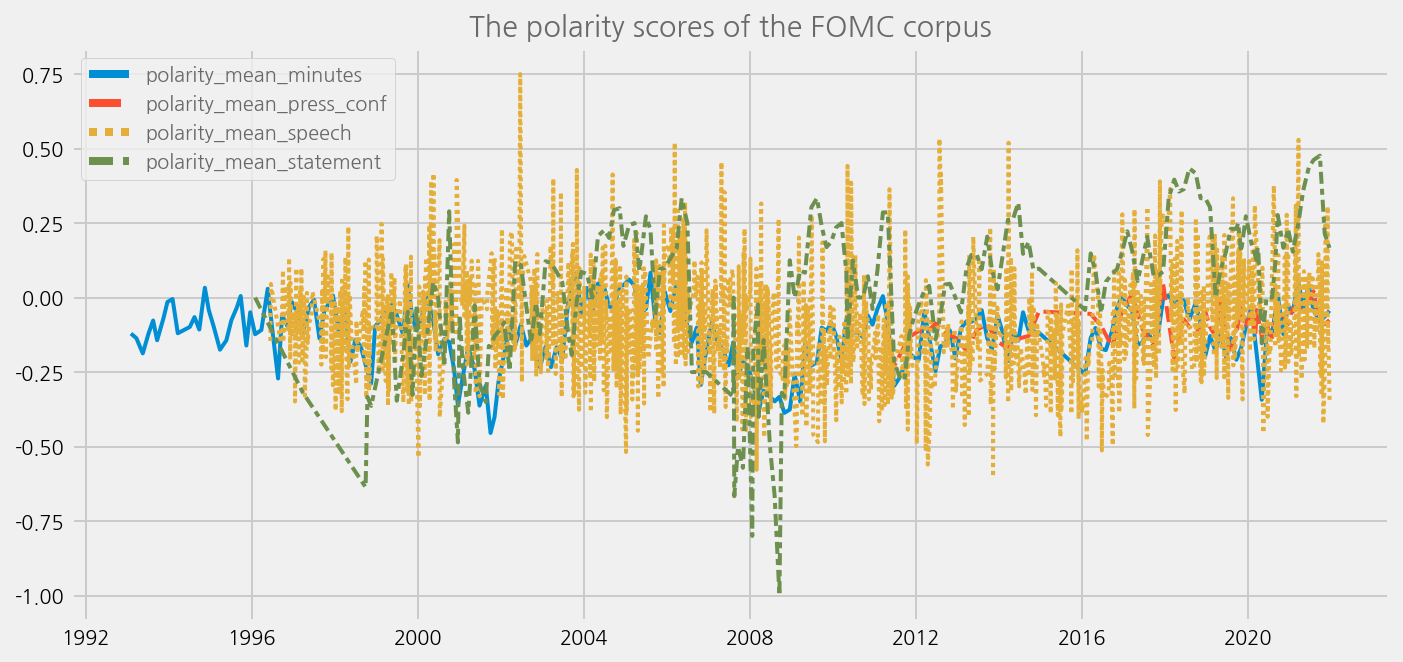

In [14]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_mean_minutes', 'polarity_mean_press_conf', 'polarity_mean_speech', 'polarity_mean_statement']
cfg.ax.title = 'The polarity scores of the FOMC corpus'
eKonf.instantiate(cfg, data=tone_data_lm)

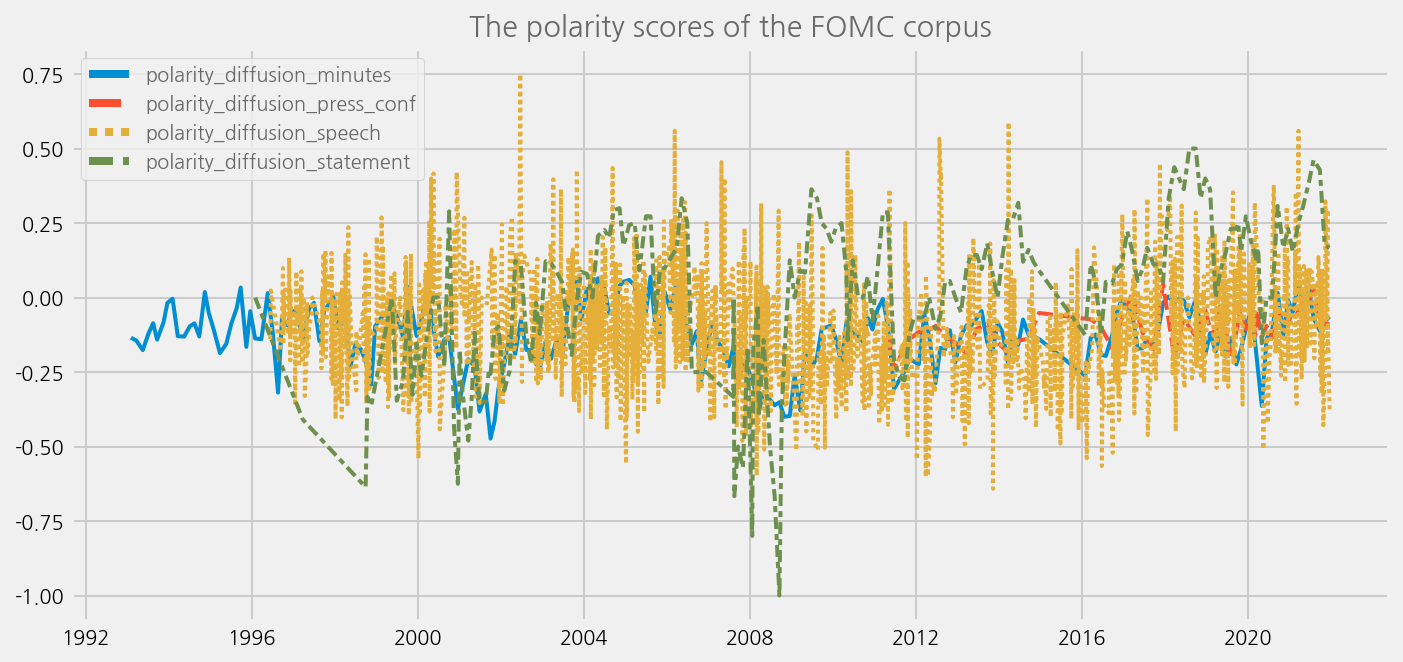

In [15]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement']
cfg.ax.title = 'The polarity scores of the FOMC corpus'
eKonf.instantiate(cfg, data=tone_data_lm)


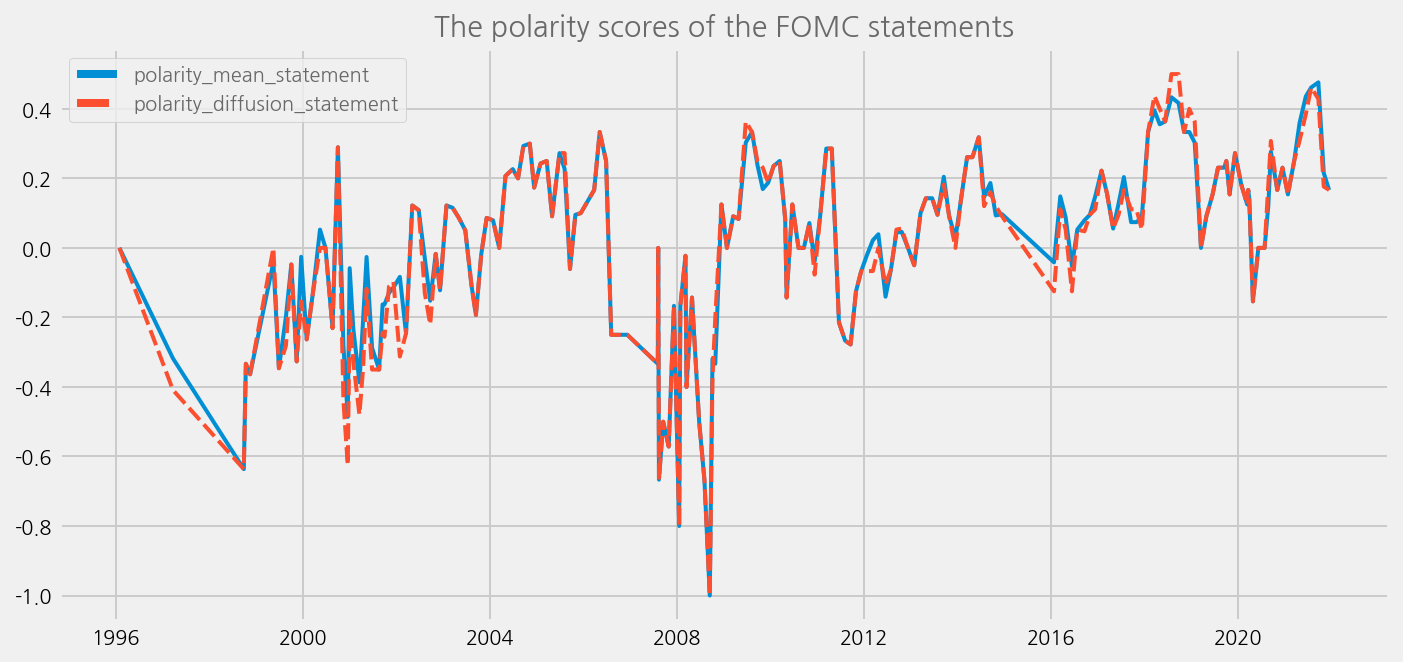

In [16]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_mean_statement', 'polarity_diffusion_statement']
cfg.ax.title = 'The polarity scores of the FOMC statements'
eKonf.instantiate(cfg, data=tone_data_lm)

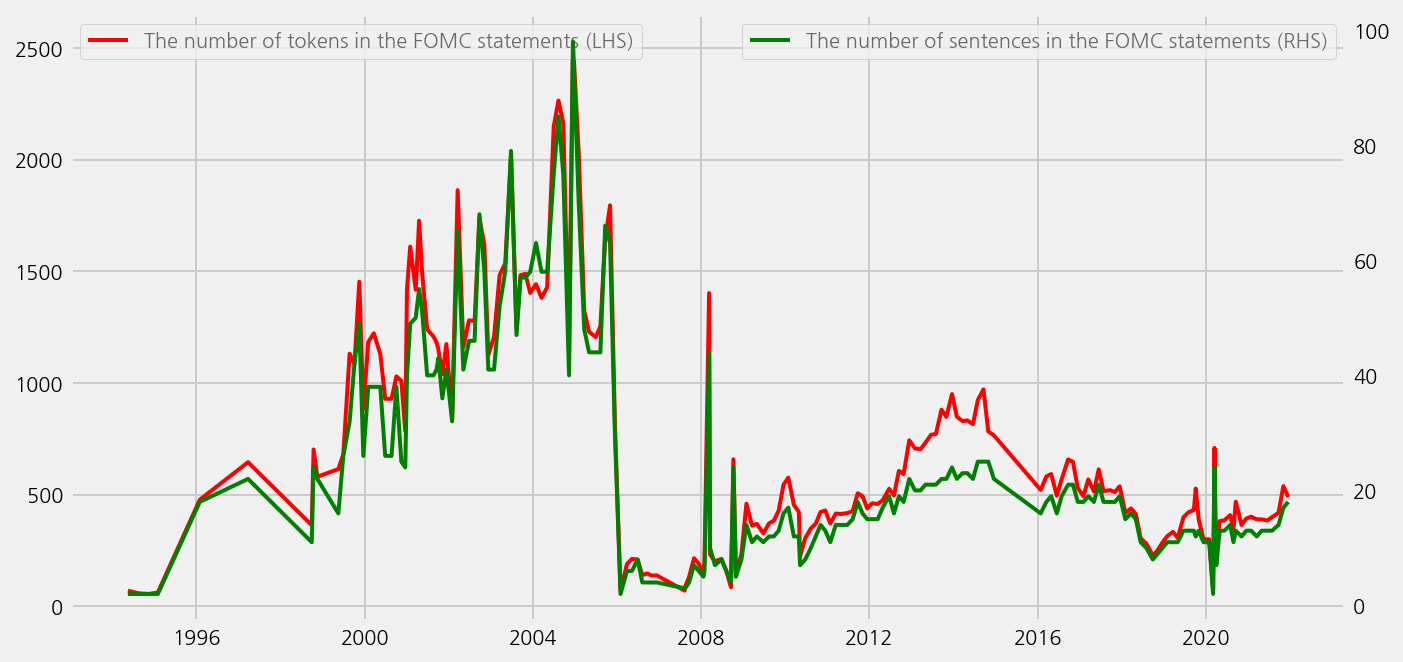

In [17]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plots.append(cfg.plot.copy())
cfg.plots[0].y = "num_tokens_sum_statement"
cfg.plots[0].rcParams = dict(linewidth=2.5, color="red")
cfg.plots[1].y = "num_examples_statement"
cfg.plots[1].rcParams = dict(linewidth=1.5, color="green")
cfg.plots[1].secondary_y = True
cfg.ax.legend = dict(
    labels=[
        "The number of tokens in the FOMC statements (LHS)",
    ],
    loc=2,
)
ax2 = cfg.ax.copy()
ax2.grid = False
ax2.secondary_y = True
ax2.legend = dict(
    labels=["The number of sentences in the FOMC statements (RHS)"],
    loc=1,
)
cfg.axes.append(ax2)

eKonf.instantiate(cfg, data=tone_data_lm)

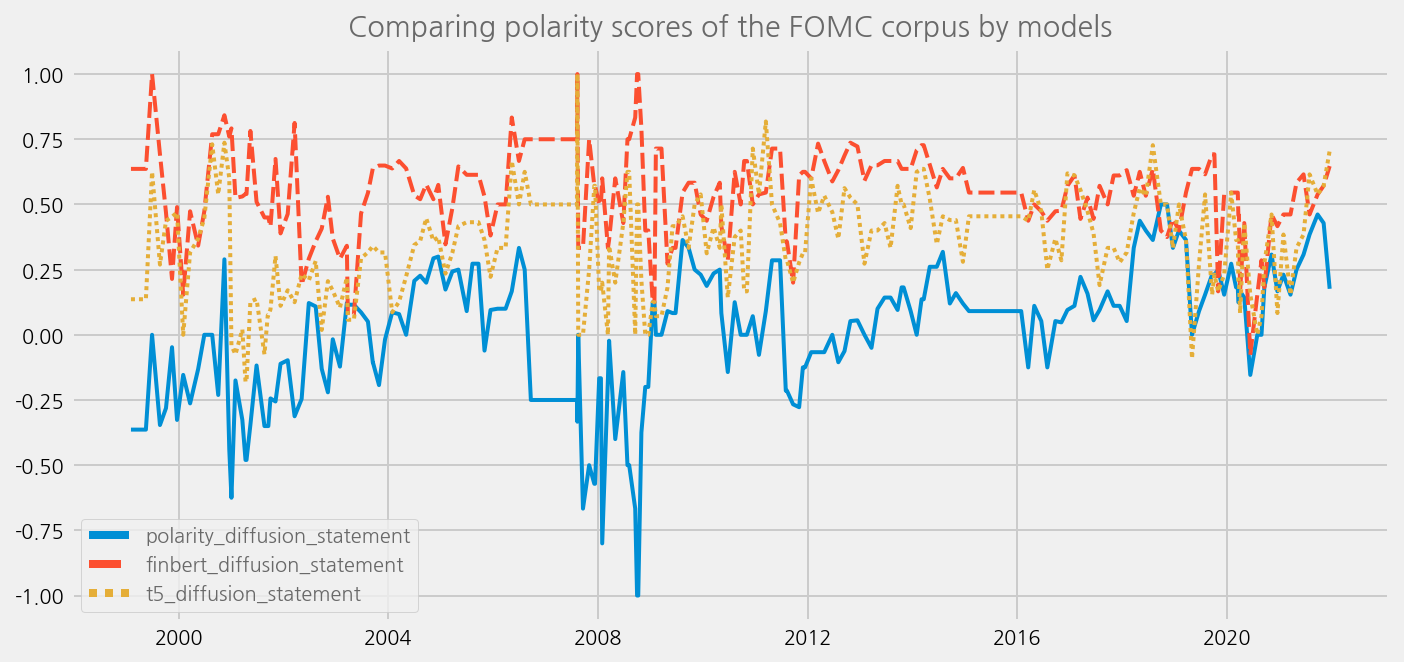

In [18]:
sentiments = ['polarity_diffusion_statement', 'finbert_diffusion_statement', 't5_diffusion_statement']

cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = sentiments
cfg.ax.title = 'Comparing polarity scores of the FOMC corpus by models'
eKonf.instantiate(cfg, data=merged_tone_data)

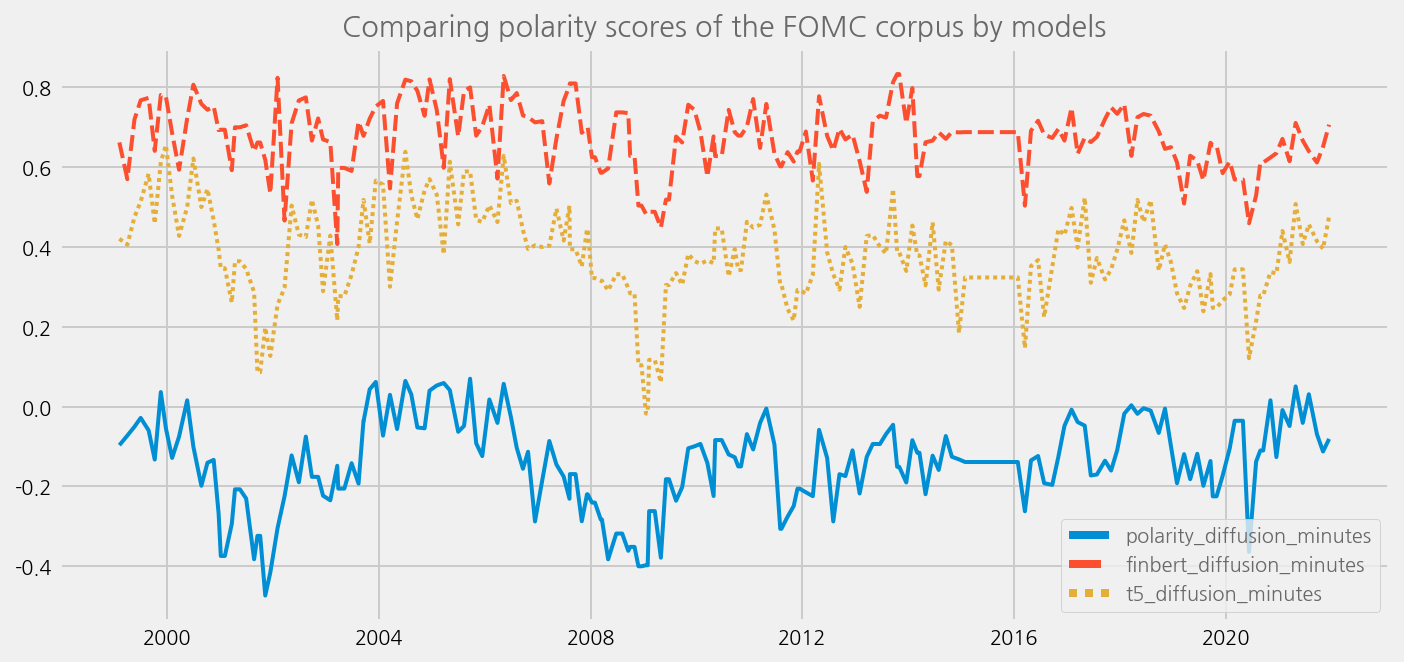

In [19]:
sentiments = ['polarity_diffusion_minutes', 'finbert_diffusion_minutes', 't5_diffusion_minutes']

cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = sentiments
cfg.ax.title = 'Comparing polarity scores of the FOMC corpus by models'
eKonf.instantiate(cfg, data=merged_tone_data)

### Plot the results and compare to the economical uncertainty / systemic risk periods

In [20]:
def plot_sentiments_over_crisis_periods(name='polarity_diffusion_statement', window=2):
    recessions = fomc.recessions.to_dict(orient="records")

    span_args = eKonf.compose("visualize/plot/ax/axvspan")
    annot_args = eKonf.compose("visualize/plot/ax/annotation")
    span_args.color = "crimson"
    span_args.alpha = 0.4

    spans = []
    annotations = []
    for span in recessions:
        annotation = span["name"]
        start = span["from_date"]
        end = span["to_date"]
        span = span_args.copy()
        span.xmin, span.xmax = eKonf.to_dateparm(start), eKonf.to_dateparm(end)

        x = start + (end - start) / 2
        y = -0.75
        annot = annot_args.copy()
        annot.text, annot.x, annot.y = annotation, eKonf.to_dateparm(x), y
        spans.append(span)
        annotations.append(annot)


    merged_tone_data["polarity_ma"] = merged_tone_data[name].rolling(window).mean()

    cfg = eKonf.compose("visualize/plot=lineplot")
    cfg.plots.append(cfg.plot.copy())
    cfg.plots[0].y = "polarity_ma"
    cfg.plots[0].linewidth = 2.5
    cfg.plots[0].palette = "r"
    cfg.plots[1].y = name
    cfg.plots[1].linewidth = 1.5
    cfg.plots[1].palette = "g"
    cfg.ax.title = f"Polarity scores of {name}"
    cfg.ax.legend.labels = [
        f"{window} period MA",
        f"Polarity score of {name}",
    ]
    cfg.ax.axvspans = spans
    cfg.ax.annotations = annotations
    eKonf.instantiate(cfg, data=merged_tone_data)        

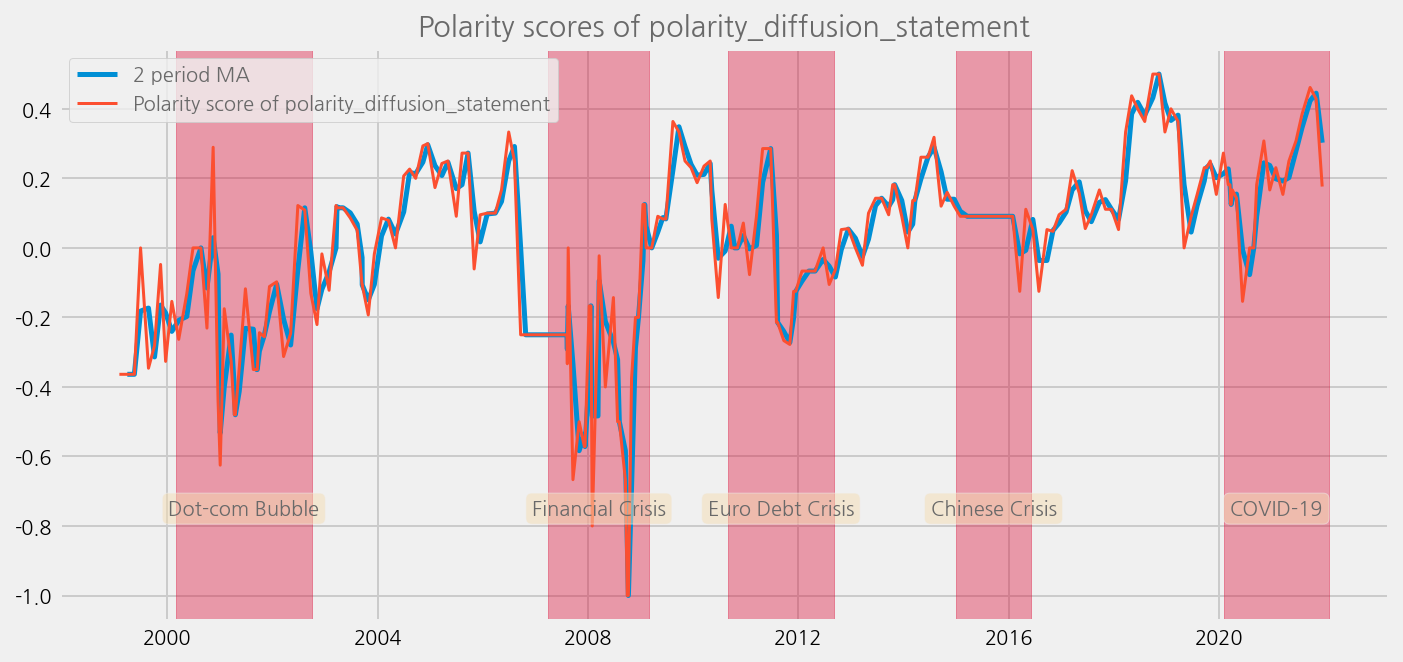

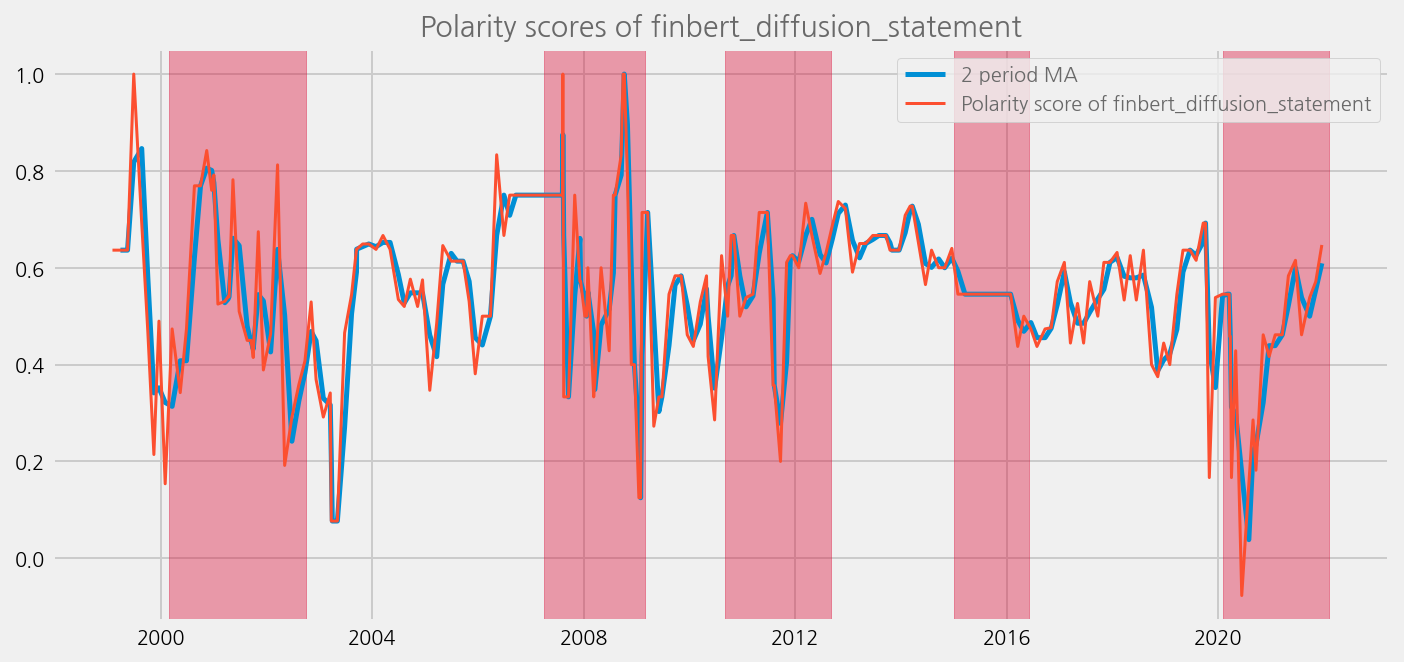

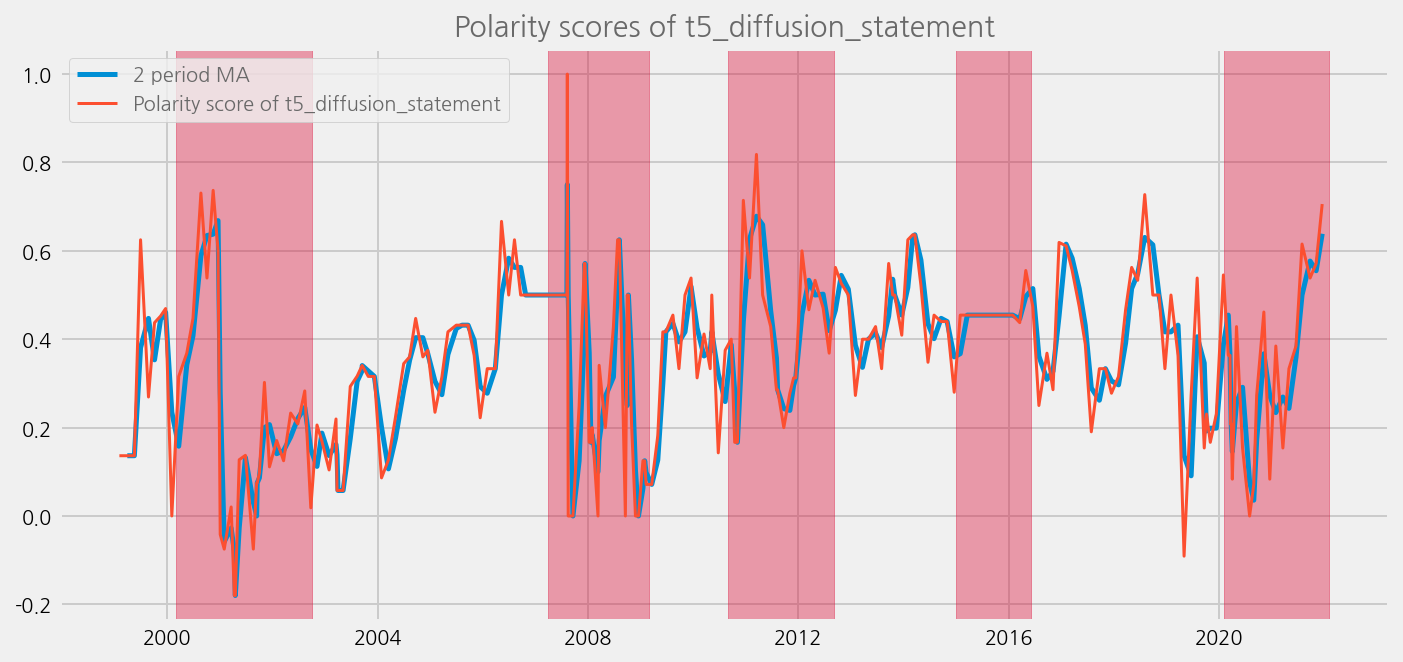

In [21]:
sentiments = ['polarity_diffusion_statement', 'finbert_diffusion_statement', 't5_diffusion_statement']
for name in sentiments:
    plot_sentiments_over_crisis_periods(name)

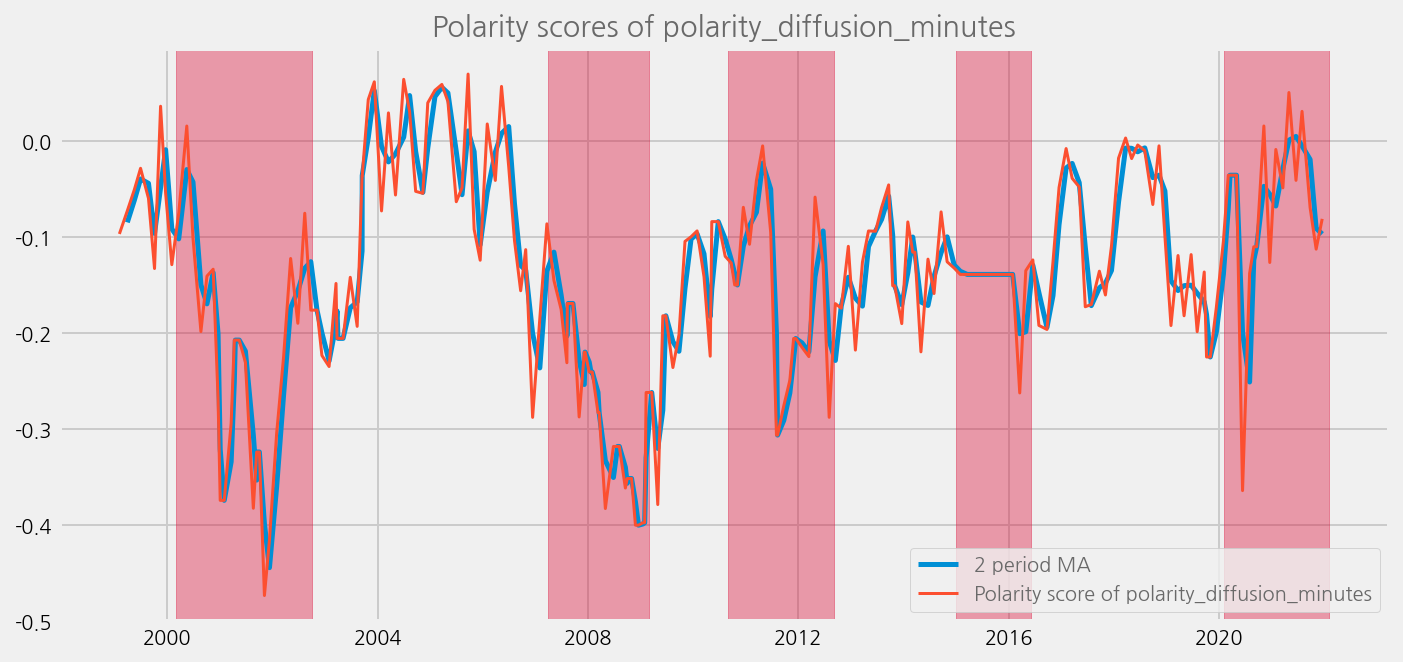

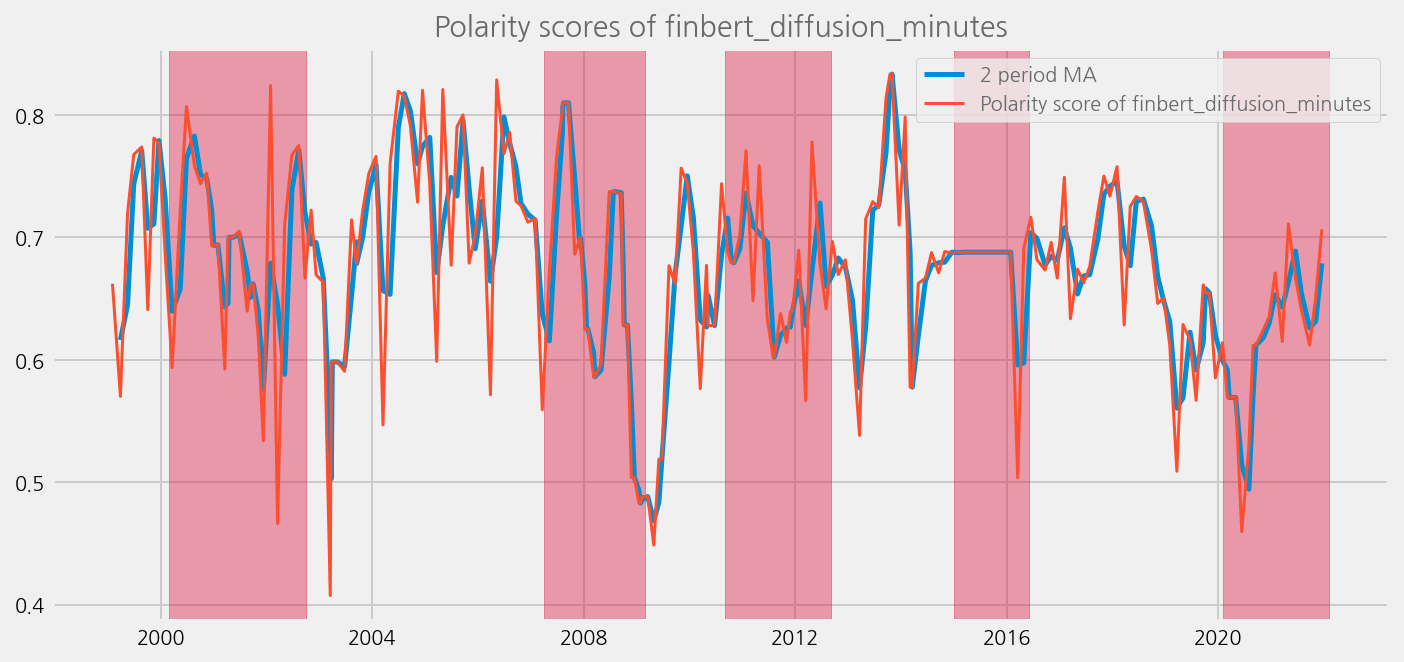

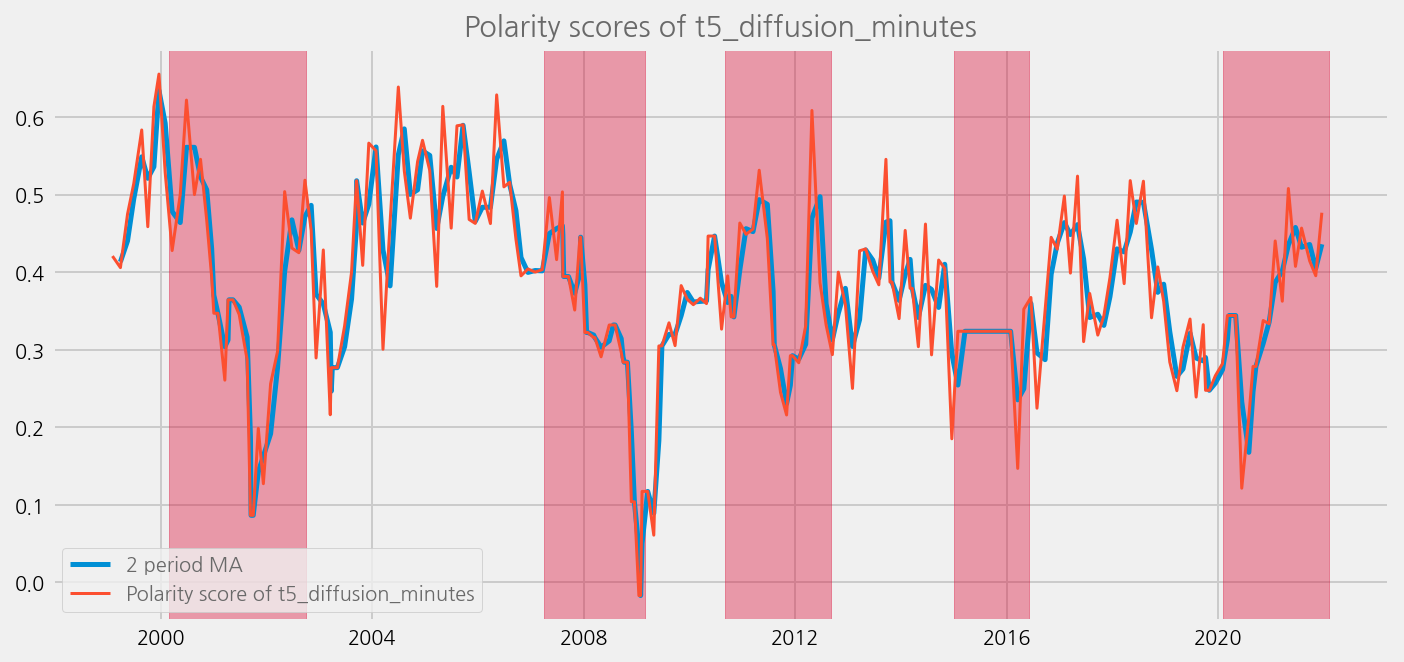

In [22]:
sentiments = ['polarity_diffusion_minutes', 'finbert_diffusion_minutes', 't5_diffusion_minutes']
for name in sentiments:
    plot_sentiments_over_crisis_periods(name)

In [23]:
from datetime import datetime

chair = fomc.chairpersons
chair = chair[chair.to_date.dt.year >= start_year]


def plot_sentiments_over_chair_periods(name='polarity_diffusion_statement', window=3):

    annot_args = eKonf.compose("visualize/plot/ax/annotation")

    spans = []
    annotations = []
    for row in chair.iterrows():
        row_num = row[0]
        start = row[1]["from_date"]
        if start.year < start_year:
            start = datetime(2000, 1, 1)
        end = row[1]["to_date"]
        annotation = row[1]["last_name"]
        color = "crimson" if row_num % 2 == 0 else "darkblue"
        alpha = 0.4 if row_num % 2 == 0 else 0.2
        span = {
            "xmin": eKonf.to_dateparm(start),
            "xmax": eKonf.to_dateparm(end),
            "alpha": alpha,
            "color": color,
        }

        x = start + (end - start) / 2
        y = -0.75
        annot = annot_args.copy()
        annot.text, annot.x, annot.y = annotation, eKonf.to_dateparm(x), y

        spans.append(span)
        annotations.append(annot)

        
    merged_tone_data["polarity_ma"] = merged_tone_data[name].rolling(window).mean()
        
    cfg = eKonf.compose("visualize/plot=lineplot")
    ax2 = cfg.ax.copy()

    cfg.plots.append(cfg.plot.copy())
    cfg.plots[0].y = "polarity_ma"
    cfg.plots[0].rcParams = dict(linewidth=2.5, color="red")
    cfg.plots[1].y = name
    cfg.plots[1].rcParams = dict(linewidth=1.5, color="green")
    cfg.ax.title = f"Polarity scores of {name}"
    cfg.ax.legend = dict(
        labels=[
            f"{window} period MA",
            f"Polarity score of {name}",
        ],
        loc=2,
    )
    scatter_cfg = eKonf.compose("visualize/plot/scatterplot")
    scatter_cfg.y = "rate"
    scatter_cfg.secondary_y = True
    scatter_cfg.rcParams = dict(color="blue", alpha=0.8)
    cfg.plots.append(scatter_cfg)

    ax2.grid = False
    ax2.secondary_y = True
    ax2.ylim = "(-4, 10)"
    ax2.legend = dict(
        labels=["Fed Rate"],
        loc=1,
    )
    cfg.axes.append(ax2)
    cfg.ax.axvspans = spans
    cfg.ax.annotations = annotations

    eKonf.instantiate(cfg, data=merged_tone_data)


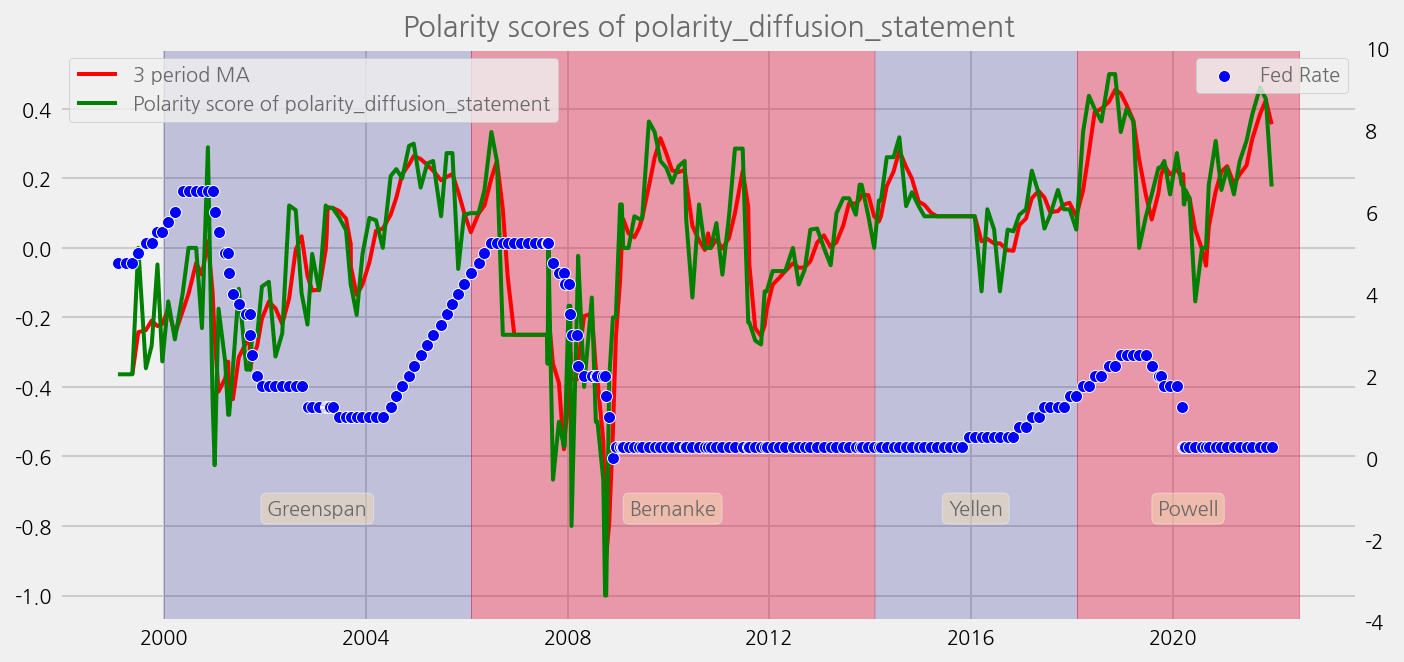

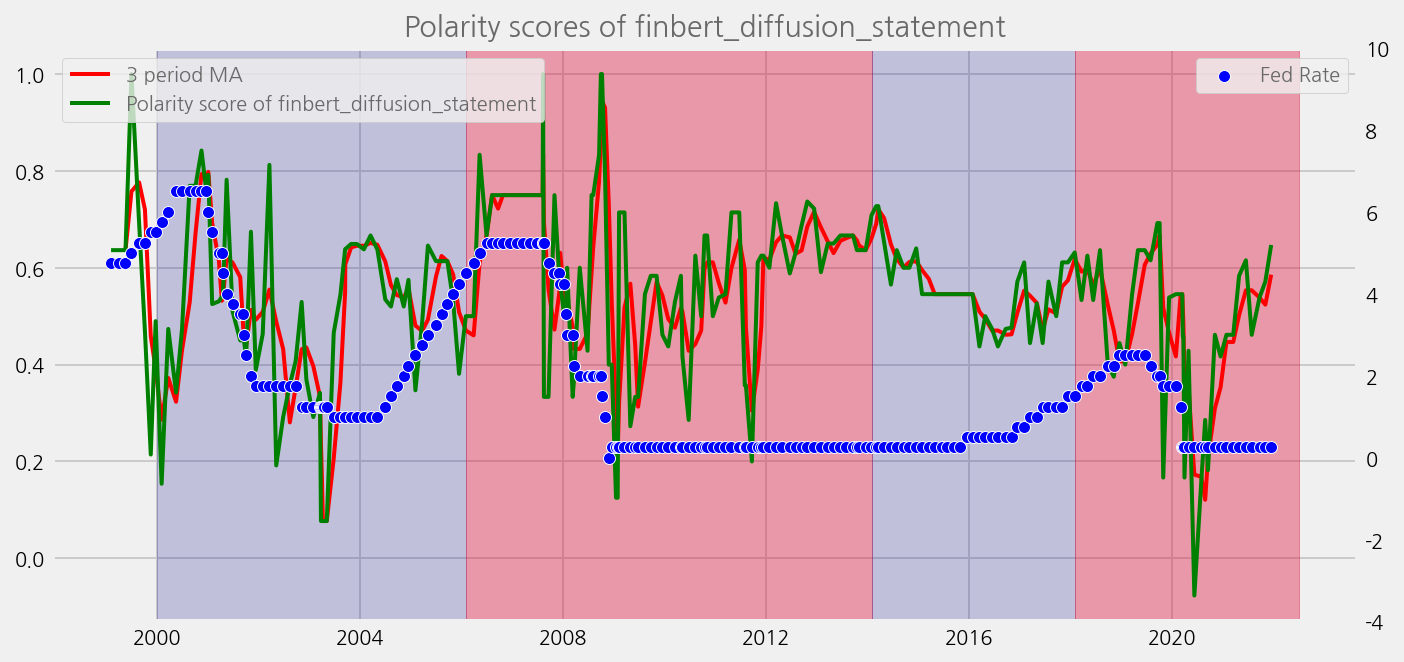

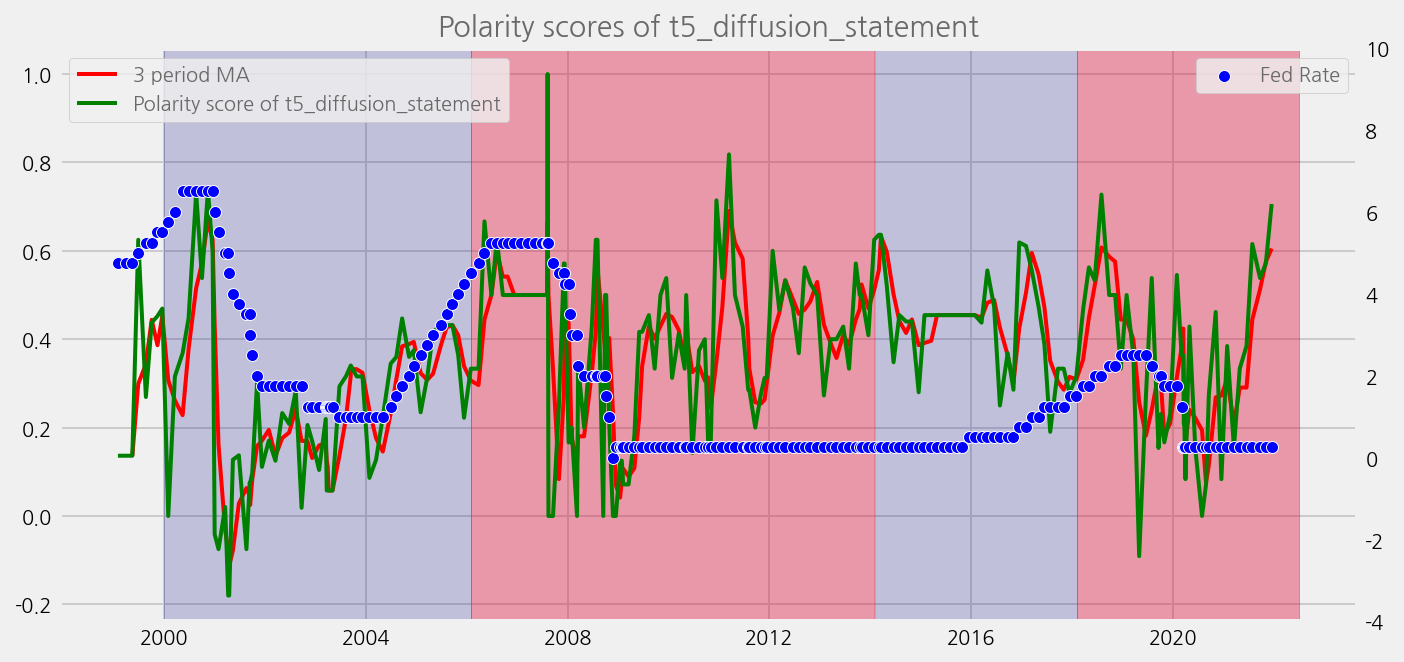

In [24]:
sentiments = ['polarity_diffusion_statement', 'finbert_diffusion_statement', 't5_diffusion_statement']
for name in sentiments:
    plot_sentiments_over_chair_periods(name)

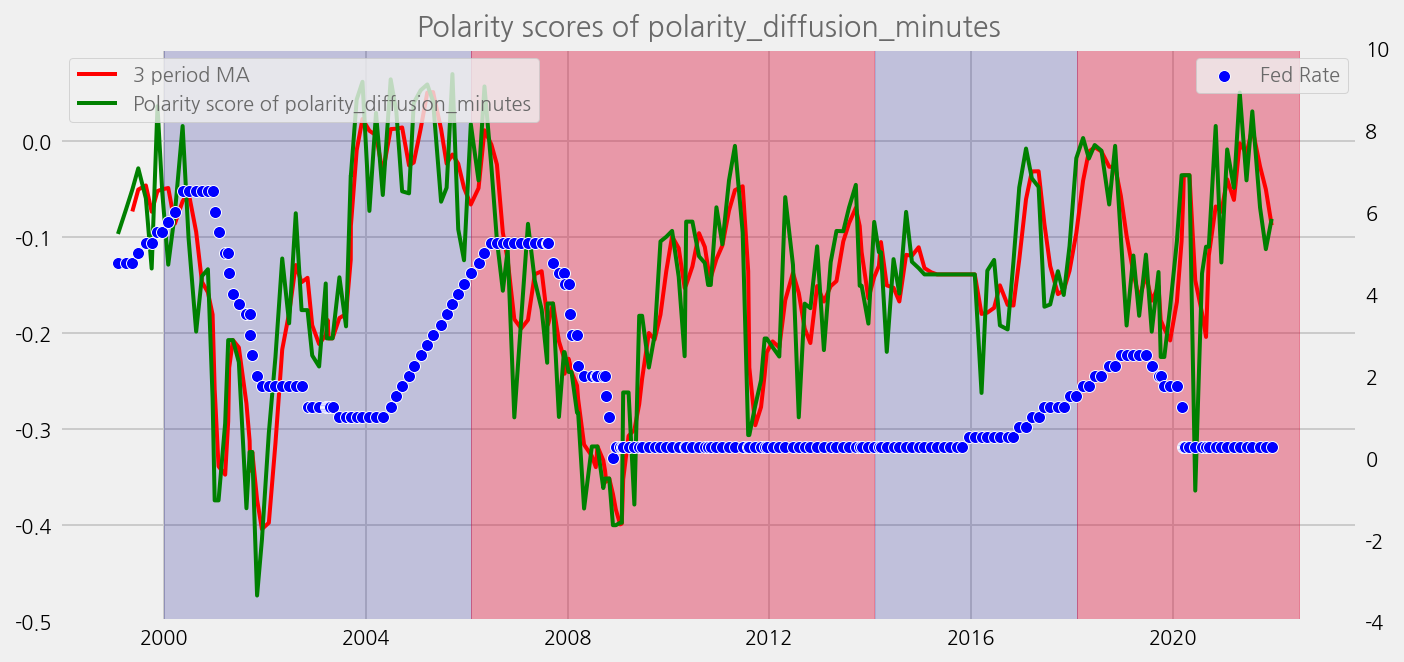

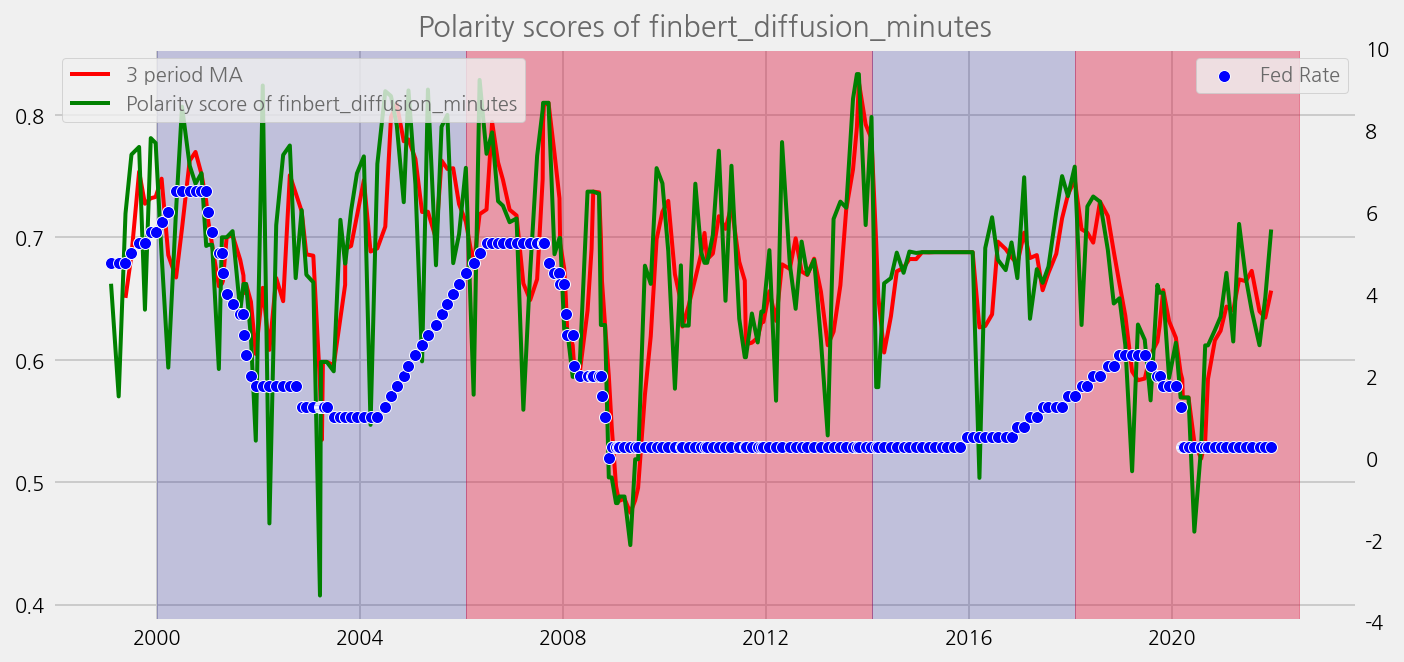

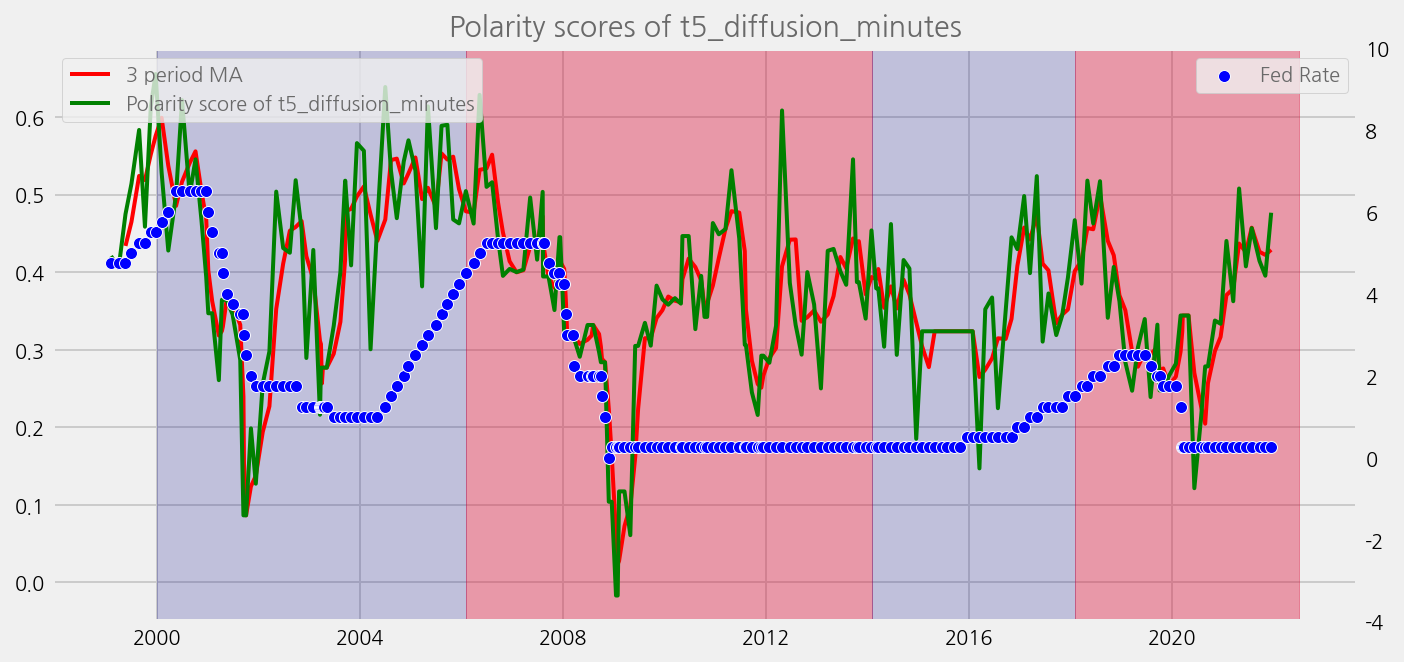

In [25]:
sentiments = ['polarity_diffusion_minutes', 'finbert_diffusion_minutes', 't5_diffusion_minutes']
for name in sentiments:
    plot_sentiments_over_chair_periods(name)

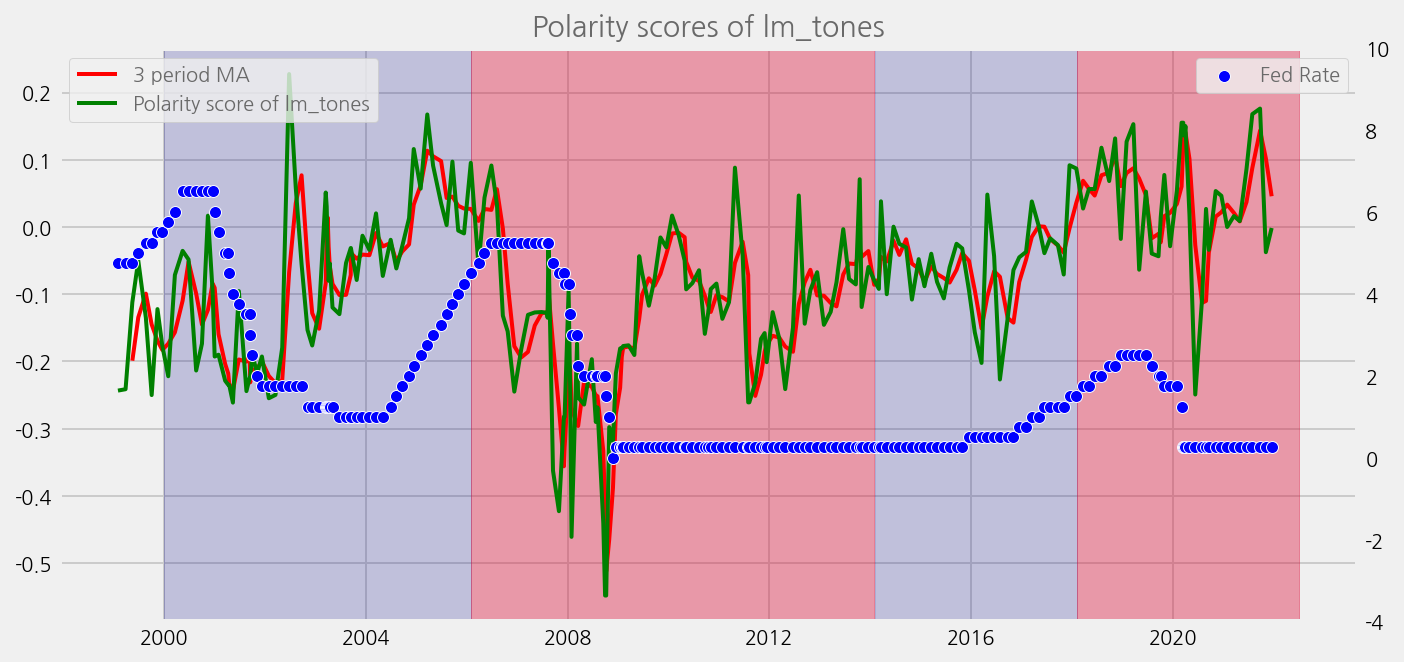

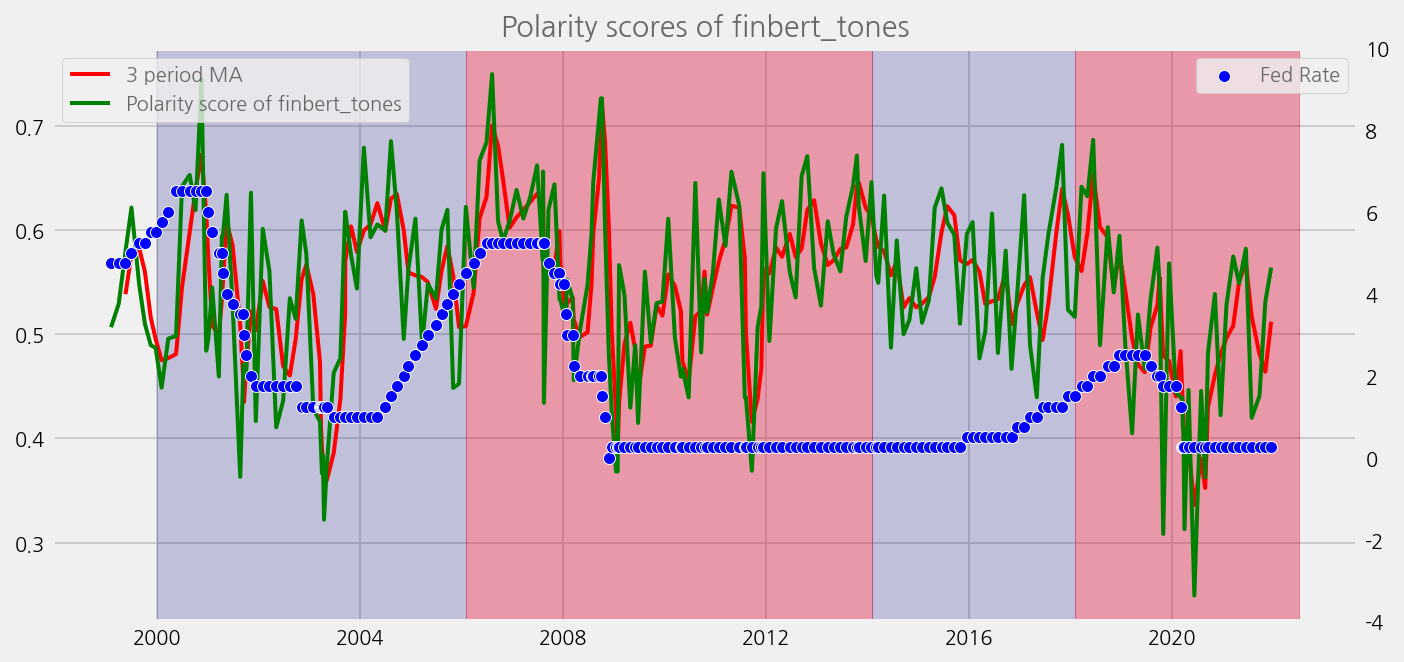

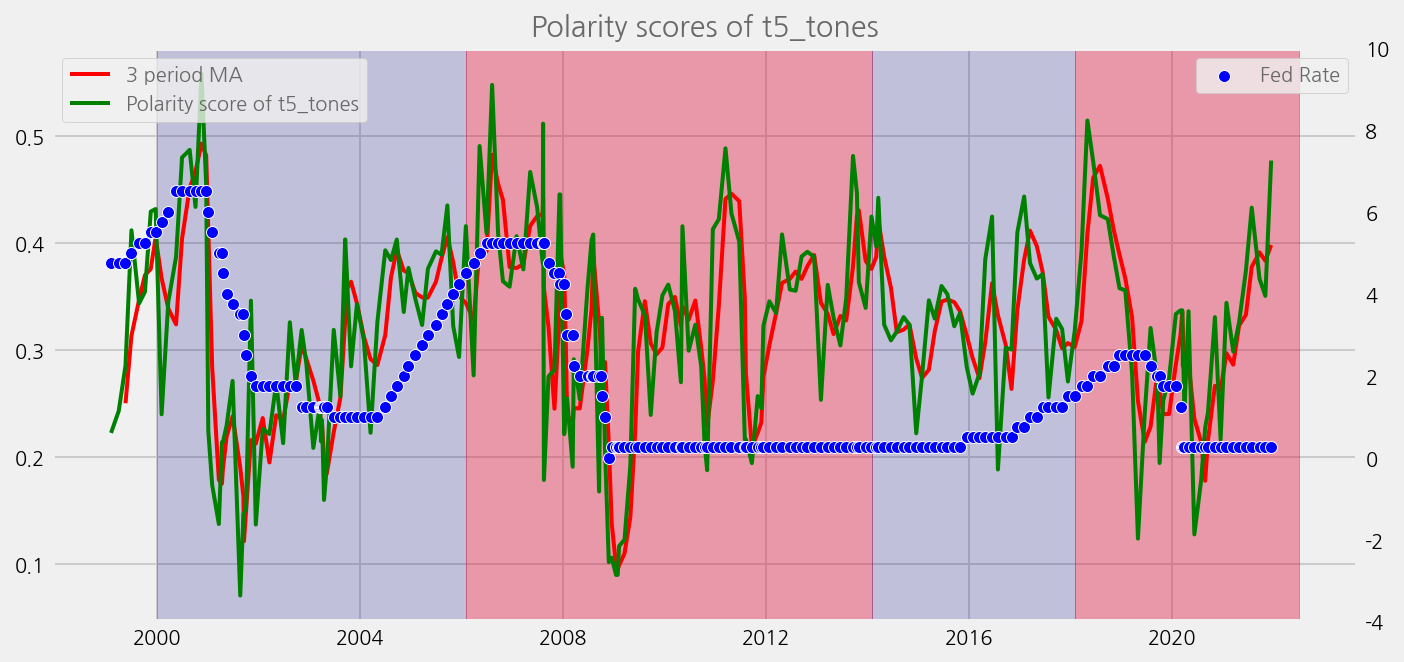

In [26]:
sentiments = ['lm_tones', 'finbert_tones', 't5_tones']
for name in sentiments:
    plot_sentiments_over_chair_periods(name)

## Build and load a feature set with tones

In [27]:
econ_train_small = eKonf.load_data("econ_train_small.parquet", data_dir)
econ_train_small

target  prev_decision  GDP_diff_prev   PMI  EMP_diff_prev  \
date                                                                   
1982-10-05    Cut            0.0       0.456199  38.8      -0.201426   
1982-11-16    Cut           -1.0      -0.382299  39.4      -0.309476   
1982-12-21   Hold           -1.0      -0.382299  39.2      -0.136097   
1983-01-14   Hold            0.0      -0.382299  42.8      -0.016895   
1983-01-21   Hold            0.0      -0.382299  42.8      -0.016895   
...           ...            ...            ...   ...            ...   
2021-11-03   Hold            0.0       0.570948  60.5       0.288624   
2021-12-15   Hold            0.0       0.570948  60.6       0.437147   
2022-01-26   Hold            0.0       0.570948  58.8       0.395555   
2022-03-16   Hike            0.0       1.680778  58.6       0.476814   
2022-05-04   Hike            1.0      -0.355417  57.1       0.283658   

            RSALES_diff_year  UNEMP_diff_prev  HSALES_diff_year  Inertia_diff  \
date                                                                            
1982-10-05          2.094256         3.061224         42.307692           0.0   
1982-11-16          2.094256         2.970297         34.831461           0.0   
1982-12-21          2.094256         3.846154         45.026178           0.0   
1983-01-14          2.094256         0.000000         14.004376           0.0   
1983-01-21          2.094256         0.000000         14.004376           0.0   
...                      ...              ...               ...           ...   
2021-11-03          8.474656        -9.615385        -26.135217           0.0   
2021-12-15         10.977142        -8.695652        -11.163337           0.0   
2022-01-26          9.101289        -7.142857         -3.673938           0.0   
2022-03-16          9.076698        -5.000000          3.125000           0.0   
2022-05-04         -0.034915         0.000000        -26.946848           0.0   

            Balanced_diff  
date                       
1982-10-05            0.0  
1982-11-16            0.0  
1982-12-21            0.0  
1983-01-14            0.0  
1983-01-21            0.0  
...                   ...  
2021-11-03            0.0  
2021-12-15            0.0  
2022-01-26            0.0  
2022-03-16            0.0  
2022-05-04            0.0  

[415 rows x 10 columns]

In [28]:
cols = [
    'polarity_diffusion_minutes', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
    'finbert_diffusion_minutes', 'finbert_diffusion_speech', 'finbert_diffusion_statement',
    't5_diffusion_minutes', 't5_diffusion_speech', 't5_diffusion_statement',
    'lm_tones', 'finbert_tones', 't5_tones'
]
fomc_train_tones = econ_train_small.merge(merged_tone_data[cols], left_index=True, right_index=True)
fomc_train_tones.index.name = 'date'
eKonf.save_data(fomc_train_tones, "fomc_train_tones.parquet", data_dir)
fomc_train_tones

target  prev_decision  GDP_diff_prev   PMI  EMP_diff_prev  \
date                                                                   
1999-02-03   Hold            0.0       1.616191  46.8       0.286880   
1999-03-30   Hold            0.0       1.616191  51.7       0.327325   
1999-05-18   Hold            0.0       0.943827  52.3       0.288551   
1999-06-30   Hike            0.0       0.943827  54.3       0.164078   
1999-08-24   Hike            1.0       0.835000  53.6       0.251764   
...           ...            ...            ...   ...            ...   
2021-06-16   Hold            0.0       1.533890  61.6       0.308928   
2021-07-28   Hold            0.0       1.533890  60.9       0.383765   
2021-09-22   Hold            0.0       1.640747  59.7       0.353173   
2021-11-03   Hold            0.0       0.570948  60.5       0.288624   
2021-12-15   Hold            0.0       0.570948  60.6       0.437147   

            RSALES_diff_year  UNEMP_diff_prev  HSALES_diff_year  Inertia_diff  \
date                                                                            
1999-02-03          4.952373         0.000000         19.672131           0.0   
1999-03-30          5.932944         2.325581         -2.078522           0.0   
1999-05-18          4.601659         2.380952          6.004619           0.0   
1999-06-30          5.248177        -2.325581          0.112740           0.0   
1999-08-24          6.166822         0.000000          2.739726           0.0   
...                      ...              ...               ...           ...   
2021-06-16         22.314413        -3.333333          4.815864           0.0   
2021-07-28         13.352829         1.724138        -22.559653           0.0   
2021-09-22          9.952513        -3.703704        -33.783784           0.0   
2021-11-03          8.474656        -9.615385        -26.135217           0.0   
2021-12-15         10.977142        -8.695652        -11.163337           0.0   

            Balanced_diff  ...  polarity_diffusion_statement  \
date                       ...                                 
1999-02-03            0.0  ...                     -0.363636   
1999-03-30            0.0  ...                     -0.363636   
1999-05-18            0.0  ...                     -0.363636   
1999-06-30            0.0  ...                      0.000000   
1999-08-24            0.0  ...                     -0.346154   
...                   ...  ...                           ...   
2021-06-16            0.0  ...                      0.307692   
2021-07-28            0.0  ...                      0.384615   
2021-09-22            0.0  ...                      0.461538   
2021-11-03            0.0  ...                      0.428571   
2021-12-15            0.0  ...                      0.176471   

            finbert_diffusion_minutes  finbert_diffusion_speech  \
date                                                              
1999-02-03                   0.662069                  0.222222   
1999-03-30                   0.570048                  0.381295   
1999-05-18                   0.719424                  0.383234   
1999-06-30                   0.767606                  0.097561   
1999-08-24                   0.773810                  0.178947   
...                               ...                       ...   
2021-06-16                   0.666667                  0.464567   
2021-07-28                   0.640138                  0.157895   
2021-09-22                   0.611842                  0.172840   
2021-11-03                   0.651163                  0.371429   
2021-12-15                   0.706383                  0.338889   

            finbert_diffusion_statement  t5_diffusion_minutes  \
date                                                            
1999-02-03                     0.636364              0.420690   
1999-03-30                     0.636364              0.405797   
1999-05-18                     0.636364              0.

In [29]:
econ_cols = [
    "prev_decision",
    "GDP_diff_prev",
    "PMI",
    "EMP_diff_prev",
    "RSALES_diff_year",
    "UNEMP_diff_prev",
    "HSALES_diff_year",
    "Inertia_diff",
    "Balanced_diff",
]
data_cols = econ_cols + cols

cfg = eKonf.compose("dataset=feature_build")
cfg.name = "fomc_tone_features"
cfg.data_dir = data_dir
cfg.data_file = "fomc_train_tones.parquet"
cfg.force.build = True
cfg.pipeline.split_sampling.stratify_on = "target"
cfg.pipeline.split_sampling.random_state = 5678
cfg.pipeline.split_sampling.test_size = 0.3
cfg.pipeline.reset_index.index_column_name = "date"
cfg.column_info.columns.index = "index"
cfg.column_info.columns.id = "date"
cfg.column_info.columns.x = data_cols
cfg.column_info.columns.y = "target"
f_tones = eKonf.instantiate(cfg)
f_tones.persist()

In [30]:
cfg = eKonf.compose(config_group="dataset=feature")
cfg.name = "fomc_tone_features"
cfg.data_dir = data_dir
f_tones = eKonf.instantiate(cfg)
print(f_tones)

FeatureSet : fomc_tone_features


In [31]:
f_tones.COLUMN.X

['prev_decision',
 'GDP_diff_prev',
 'PMI',
 'EMP_diff_prev',
 'RSALES_diff_year',
 'UNEMP_diff_prev',
 'HSALES_diff_year',
 'Inertia_diff',
 'Balanced_diff',
 'polarity_diffusion_minutes',
 'polarity_diffusion_speech',
 'polarity_diffusion_statement',
 'finbert_diffusion_minutes',
 'finbert_diffusion_speech',
 'finbert_diffusion_statement',
 't5_diffusion_minutes',
 't5_diffusion_speech',
 't5_diffusion_statement',
 'lm_tones',
 'finbert_tones',
 't5_tones']

## Visualize Features

In [32]:
f_tones.y_train = f_tones.transform_labels(f_tones.y_train)
f_tones.y_dev = f_tones.transform_labels(f_tones.y_dev)
f_tones.y_test = f_tones.transform_labels(f_tones.y_test)

In [33]:
X_cols = f_tones.COLUMN.X
y_col = f_tones.COLUMN.Y
print(f_tones.classes, X_cols, y_col)

['Cut', 'Hike', 'Hold'] ['prev_decision', 'GDP_diff_prev', 'PMI', 'EMP_diff_prev', 'RSALES_diff_year', 'UNEMP_diff_prev', 'HSALES_diff_year', 'Inertia_diff', 'Balanced_diff', 'polarity_diffusion_minutes', 'polarity_diffusion_speech', 'polarity_diffusion_statement', 'finbert_diffusion_minutes', 'finbert_diffusion_speech', 'finbert_diffusion_statement', 't5_diffusion_minutes', 't5_diffusion_speech', 't5_diffusion_statement', 'lm_tones', 'finbert_tones', 't5_tones'] target


In [34]:
f_tones.train_data.head()

date  target  prev_decision  GDP_diff_prev   PMI  EMP_diff_prev  \
index                                                                         
0     2010-04-28       2            0.0       1.067962  58.8       0.139555   
1     2008-10-29       0           -1.0       0.572295  44.8      -0.335245   
2     2018-12-19       1            0.0       0.481953  58.8       0.068241   
3     2009-08-12       2            0.0      -0.169238  49.9      -0.259526   
4     2000-11-15       2            0.0       0.099774  48.7      -0.001511   

       RSALES_diff_year  UNEMP_diff_prev  HSALES_diff_year  Inertia_diff  ...  \
index                                                                     ...   
0              5.061896         1.020408         12.389381           0.0  ...   
1             -6.288802         0.000000        -36.880466           0.0  ...   
2              1.349789         0.000000        -15.611814           0.0  ...   
3             -7.390883         0.000000        -13.836478           0.0  ...   
4              2.243324         0.000000          6.995413           0.0  ...   

       finbert_diffusion_minutes  finbert_diffusion_speech  \
index                                                        
0                       0.677083                  0.117647   
1                       0.628378                  0.388889   
2                       0.650206                  0.689394   
3                       0.676806                  0.458333   
4                       0.752381                  0.642276   

       finbert_diffusion_statement  t5_diffusion_minutes  t5_diffusion_speech  \
index                                                                           
0                         0.583333              0.359375             0.117647   
1                         0.791667              0.283784             0.126984   
2                         0.444444              0.362140             0.378788   
3                         0.545455              0.334601             0.208333   
4                         0.842105              0.466667             0.471545   

       t5_diffusion_statement  lm_tones  finbert_tones  t5_tones  split  
index                                                                    
0                    0.333333 -0.050143       0.459355  0.270118  train  
1                    0.208333 -0.297673       0.602978  0.206367  train  
2                    0.333333 -0.017770       0.594681  0.358087  train  
3                    0.454545 -0.117091       0.560198  0.332493  train  
4                    0.736842  0.016816       0.745588  0.558351  train  

[5 rows x 24 columns]

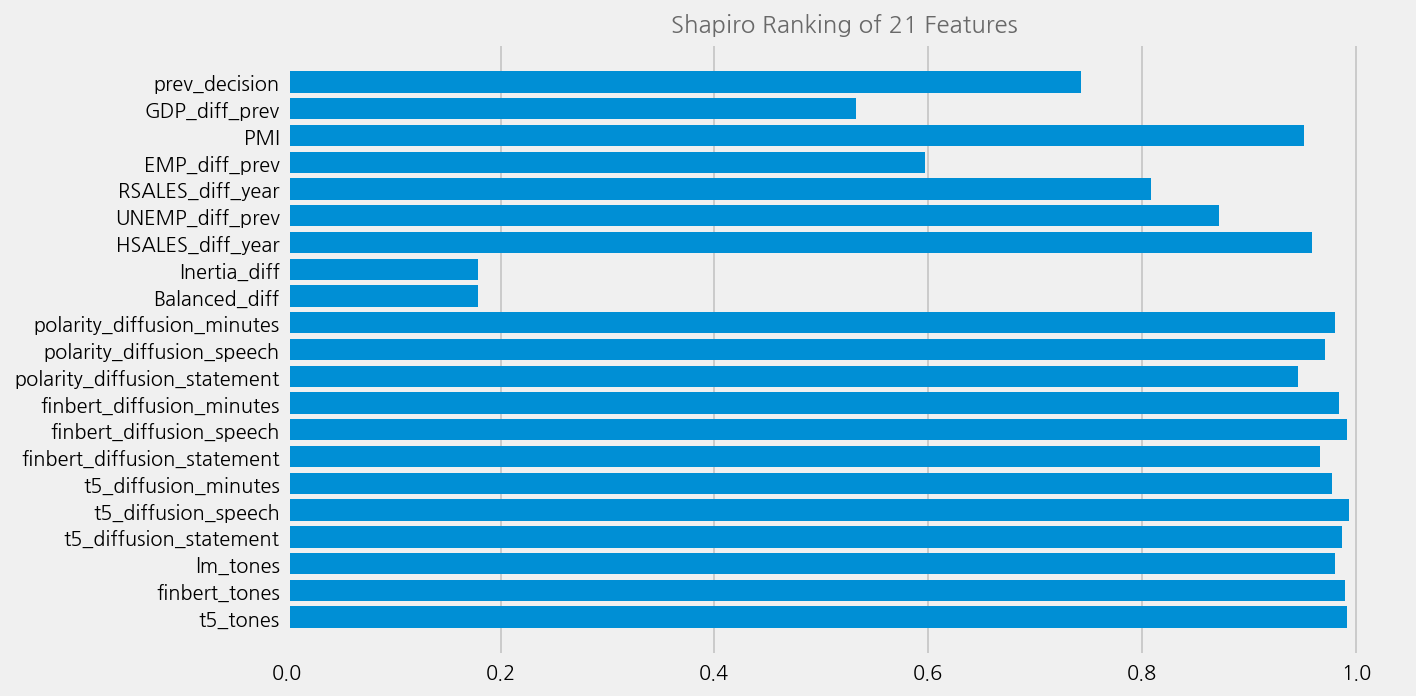

In [35]:
cfg = eKonf.compose(config_group="visualize/plot=rank1d")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.plots[0].classes = f_tones.classes
eKonf.instantiate(cfg, data=f_tones.data)

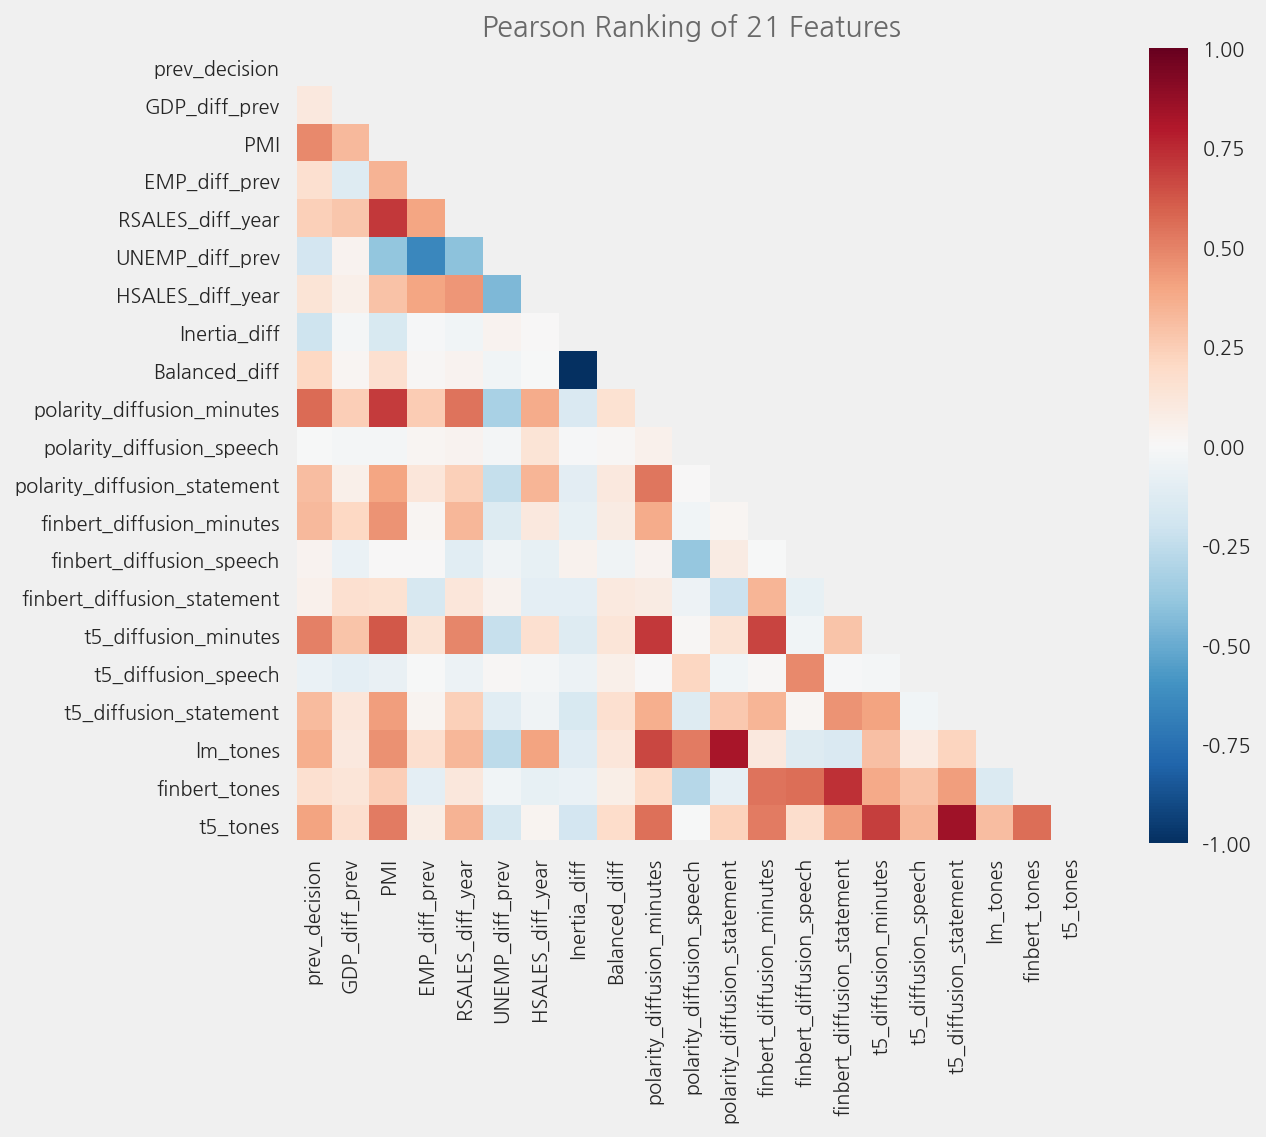

In [36]:
cfg = eKonf.compose(config_group="visualize/plot=rank2d")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.figure.figsize = (10, 8)
eKonf.instantiate(cfg, data=f_tones.data)

## Monetary Policy Shocks

Christiano, Lawrence J., Martin Eichenbaum, and Charles L. Evans. 1999.
"Monetary Policy Shocks: What Have We Learned and to What End?"

In [37]:
ids = [
    'GDPC1',     # Real GDP    
    'PCECC96',   # Real Consumption    
    'GDPDEF',    # GDP Deflator
    'GPDIC1',    # Real investment
    'COMPRNFB',  # Real wage
    'OPHNFB',    # Labor productivity
    'FEDFUNDS',  # Federal funds rate
    'CP',        # Real profit
    'M2SL',      # M2
    'SP500',     # SP500
    'CPIAUCSL',  # CPI
]
    
cfg = eKonf.compose("io/fetcher=quandl")
cfg.series_name = 'value'
cfg.series_id = ids
# cfg.force_download = True
quandl = eKonf.instantiate(cfg)

econ_data = quandl.data.reset_index()

In [38]:
cfg = eKonf.compose('pipeline/pivot')
cfg.index = 'date'
cfg.columns = 'series_id'
cfg.values = ['value']
econ_data_pivot = eKonf.pipe(econ_data, cfg)
econ_data_pivot
# eKonf.save_data(tone_data_lm, 'fomc_tone_data_lm.parquet', data_dir)

series_id       date  COMPRNFB     CP  CPIAUCSL  FEDFUNDS    GDPC1  GDPDEF  \
0         1946-01-01       NaN    NaN       NaN       NaN      NaN     NaN   
1         1946-04-01       NaN    NaN       NaN       NaN      NaN     NaN   
2         1946-07-01       NaN    NaN       NaN       NaN      NaN     NaN   
3         1946-10-01       NaN    NaN       NaN       NaN      NaN     NaN   
4         1947-01-01    35.824  21.97     21.48       NaN  2034.45  11.952   
...              ...       ...    ...       ...       ...      ...     ...   
3450      2022-06-24       NaN    NaN       NaN       NaN      NaN     NaN   
3451      2022-06-27       NaN    NaN       NaN       NaN      NaN     NaN   
3452      2022-06-28       NaN    NaN       NaN       NaN      NaN     NaN   
3453      2022-06-29       NaN    NaN       NaN       NaN      NaN     NaN   
3454      2022-06-30       NaN    NaN       NaN       NaN      NaN     NaN   

series_id   GPDIC1  M2SL  OPHNFB  PCECC96    SP500  
0              NaN   NaN     NaN      NaN      NaN  
1              NaN   NaN     NaN      NaN      NaN  
2              NaN   NaN     NaN      NaN      NaN  
3              NaN   NaN     NaN      NaN      NaN  
4          218.091   NaN  23.213  1277.44      NaN  
...            ...   ...     ...      ...      ...  
3450           NaN   NaN     NaN      NaN  3911.74  
3451           NaN   NaN     NaN      NaN  3900.11  
3452           NaN   NaN     NaN      NaN  3821.55  
3453           NaN   NaN     NaN      NaN  3818.83  
3454           NaN   NaN     NaN      NaN  3785.38  

[3455 rows x 12 columns]

In [39]:
data = econ_data_pivot.set_index('date').resample('Q').last()
cols = ['COMPRNFB', 'CP', 'CPIAUCSL', 'FEDFUNDS', 'GDPC1', 'GDPDEF', 'GPDIC1', 'OPHNFB', 'PCECC96']
data[cols] = np.log(data[cols])
data['M2SL'] = data.M2SL.pct_change()
# data = data[(data.index.year >= 1965) & (data.index.year < 1996)]
# data = data[(data.index.year >= 1990) & (data.index.year < 2022)]
data = data[(data.index.year >= 1999) & (data.index.year < 2020)]
cols = ['COMPRNFB', 'CP', 'FEDFUNDS', 'GDPC1', 'GDPDEF', 'GPDIC1', 'M2SL', 'OPHNFB', 'PCECC96']
data = data[cols]
names = [
    'wage', 'profit', 'ff', 'gdp', 'gdpdef', 'inv', 'm2_growth', 'prod', 'cons' 
]
data.columns = names

tone_cols = ['t5_diffusion_minutes']
f_tone_data = fomc_train_tones[tone_cols].dropna()
names = names + tone_cols

tones_q =  f_tone_data.resample('Q').mean()
data = data.merge(tones_q[tone_cols].ffill(), left_index=True, right_index=True)
data

wage    profit        ff       gdp    gdpdef       inv  \
date                                                                     
1999-03-31  4.490814  6.259656  1.570697  9.426321  4.328560  7.674761   
1999-06-30  4.487377  6.287585  1.560248  9.434636  4.332337  7.675385   
1999-09-30  4.488625  6.285579  1.652497  9.447779  4.335891  7.702454   
1999-12-31  4.500809  6.321209  1.667707  9.464074  4.341400  7.728898   
2000-03-31  4.525607  6.268289  1.766442  9.467712  4.348017  7.721840   
...              ...       ...       ...       ...       ...       ...   
2018-12-31  4.666275  7.603558  0.819780  9.837416  4.711106  8.146027   
2019-03-31  4.686197  7.569008  0.879627  9.843376  4.714150  8.161500   
2019-06-30  4.680259  7.593626  0.867100  9.851274  4.719855  8.167918   
2019-09-30  4.677444  7.561865  0.712950  9.858106  4.723104  8.170732   
2019-12-31  4.684212  7.582525  0.438255  9.862786  4.727193  8.153961   

            m2_growth      prod      cons  t5_diffusion_minutes  
date                                                             
1999-03-31   0.013005  4.292034  8.997270              0.413243  
1999-06-30   0.016945  4.295474  9.012469              0.494452  
1999-09-30   0.013423  4.304970  9.023648              0.583333  
1999-12-31   0.015391  4.319420  9.038169              0.575703  
2000-03-31   0.015567  4.315566  9.053176              0.478189  
...               ...       ...       ...                   ...  
2018-12-31   0.010144  4.659961  9.469276              0.384419  
2019-03-31   0.010579  4.668417  9.470791              0.265512  
2019-06-30   0.016822  4.677463  9.479509              0.321257  
2019-09-30   0.016944  4.680574  9.487386              0.285546  
2019-12-31   0.020947  4.683944  9.491676              0.253866  

[84 rows x 10 columns]

### Generate impulse response functions

In [40]:
irfs = fomc.get_irf(data)
irfs.keys()

dict_keys(['wage', 'profit', 'ff', 'gdp', 'gdpdef', 'inv', 'm2_growth', 'prod', 'cons', 't5_diffusion_minutes'])

#### Impulse responses due to monetary policy shock

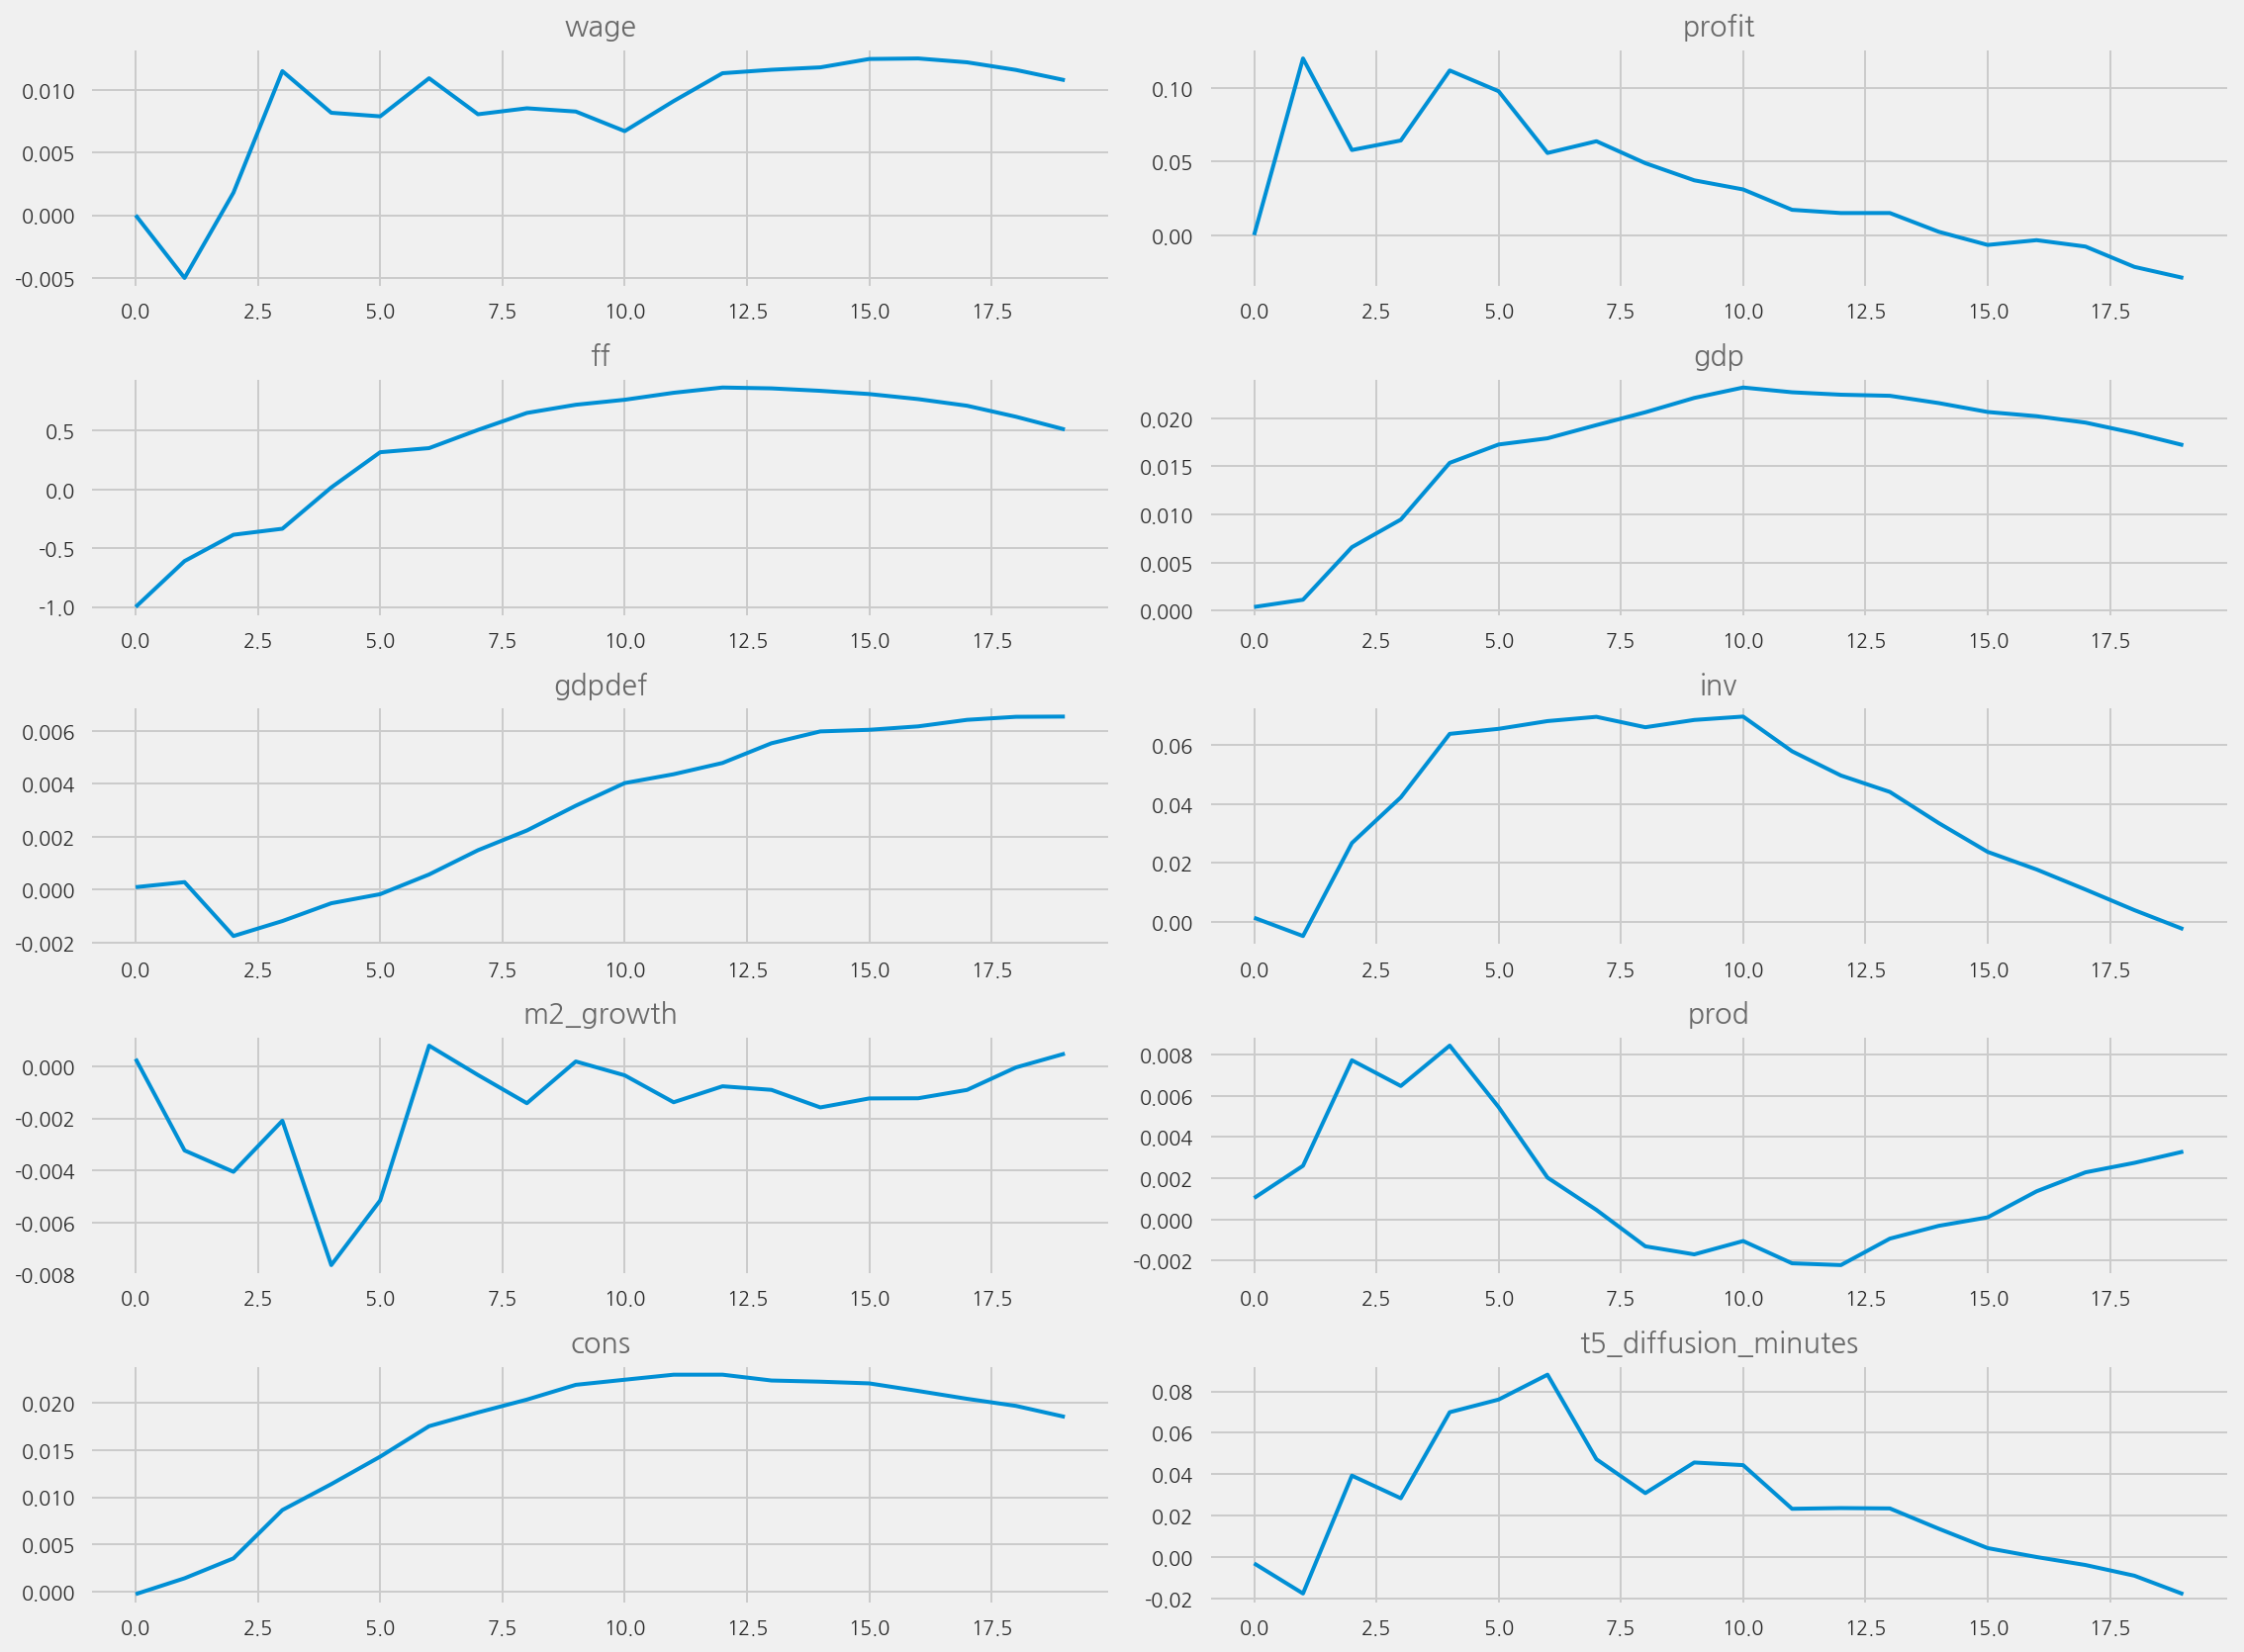

In [41]:
fomc.plot_irf(irfs, 'ff')

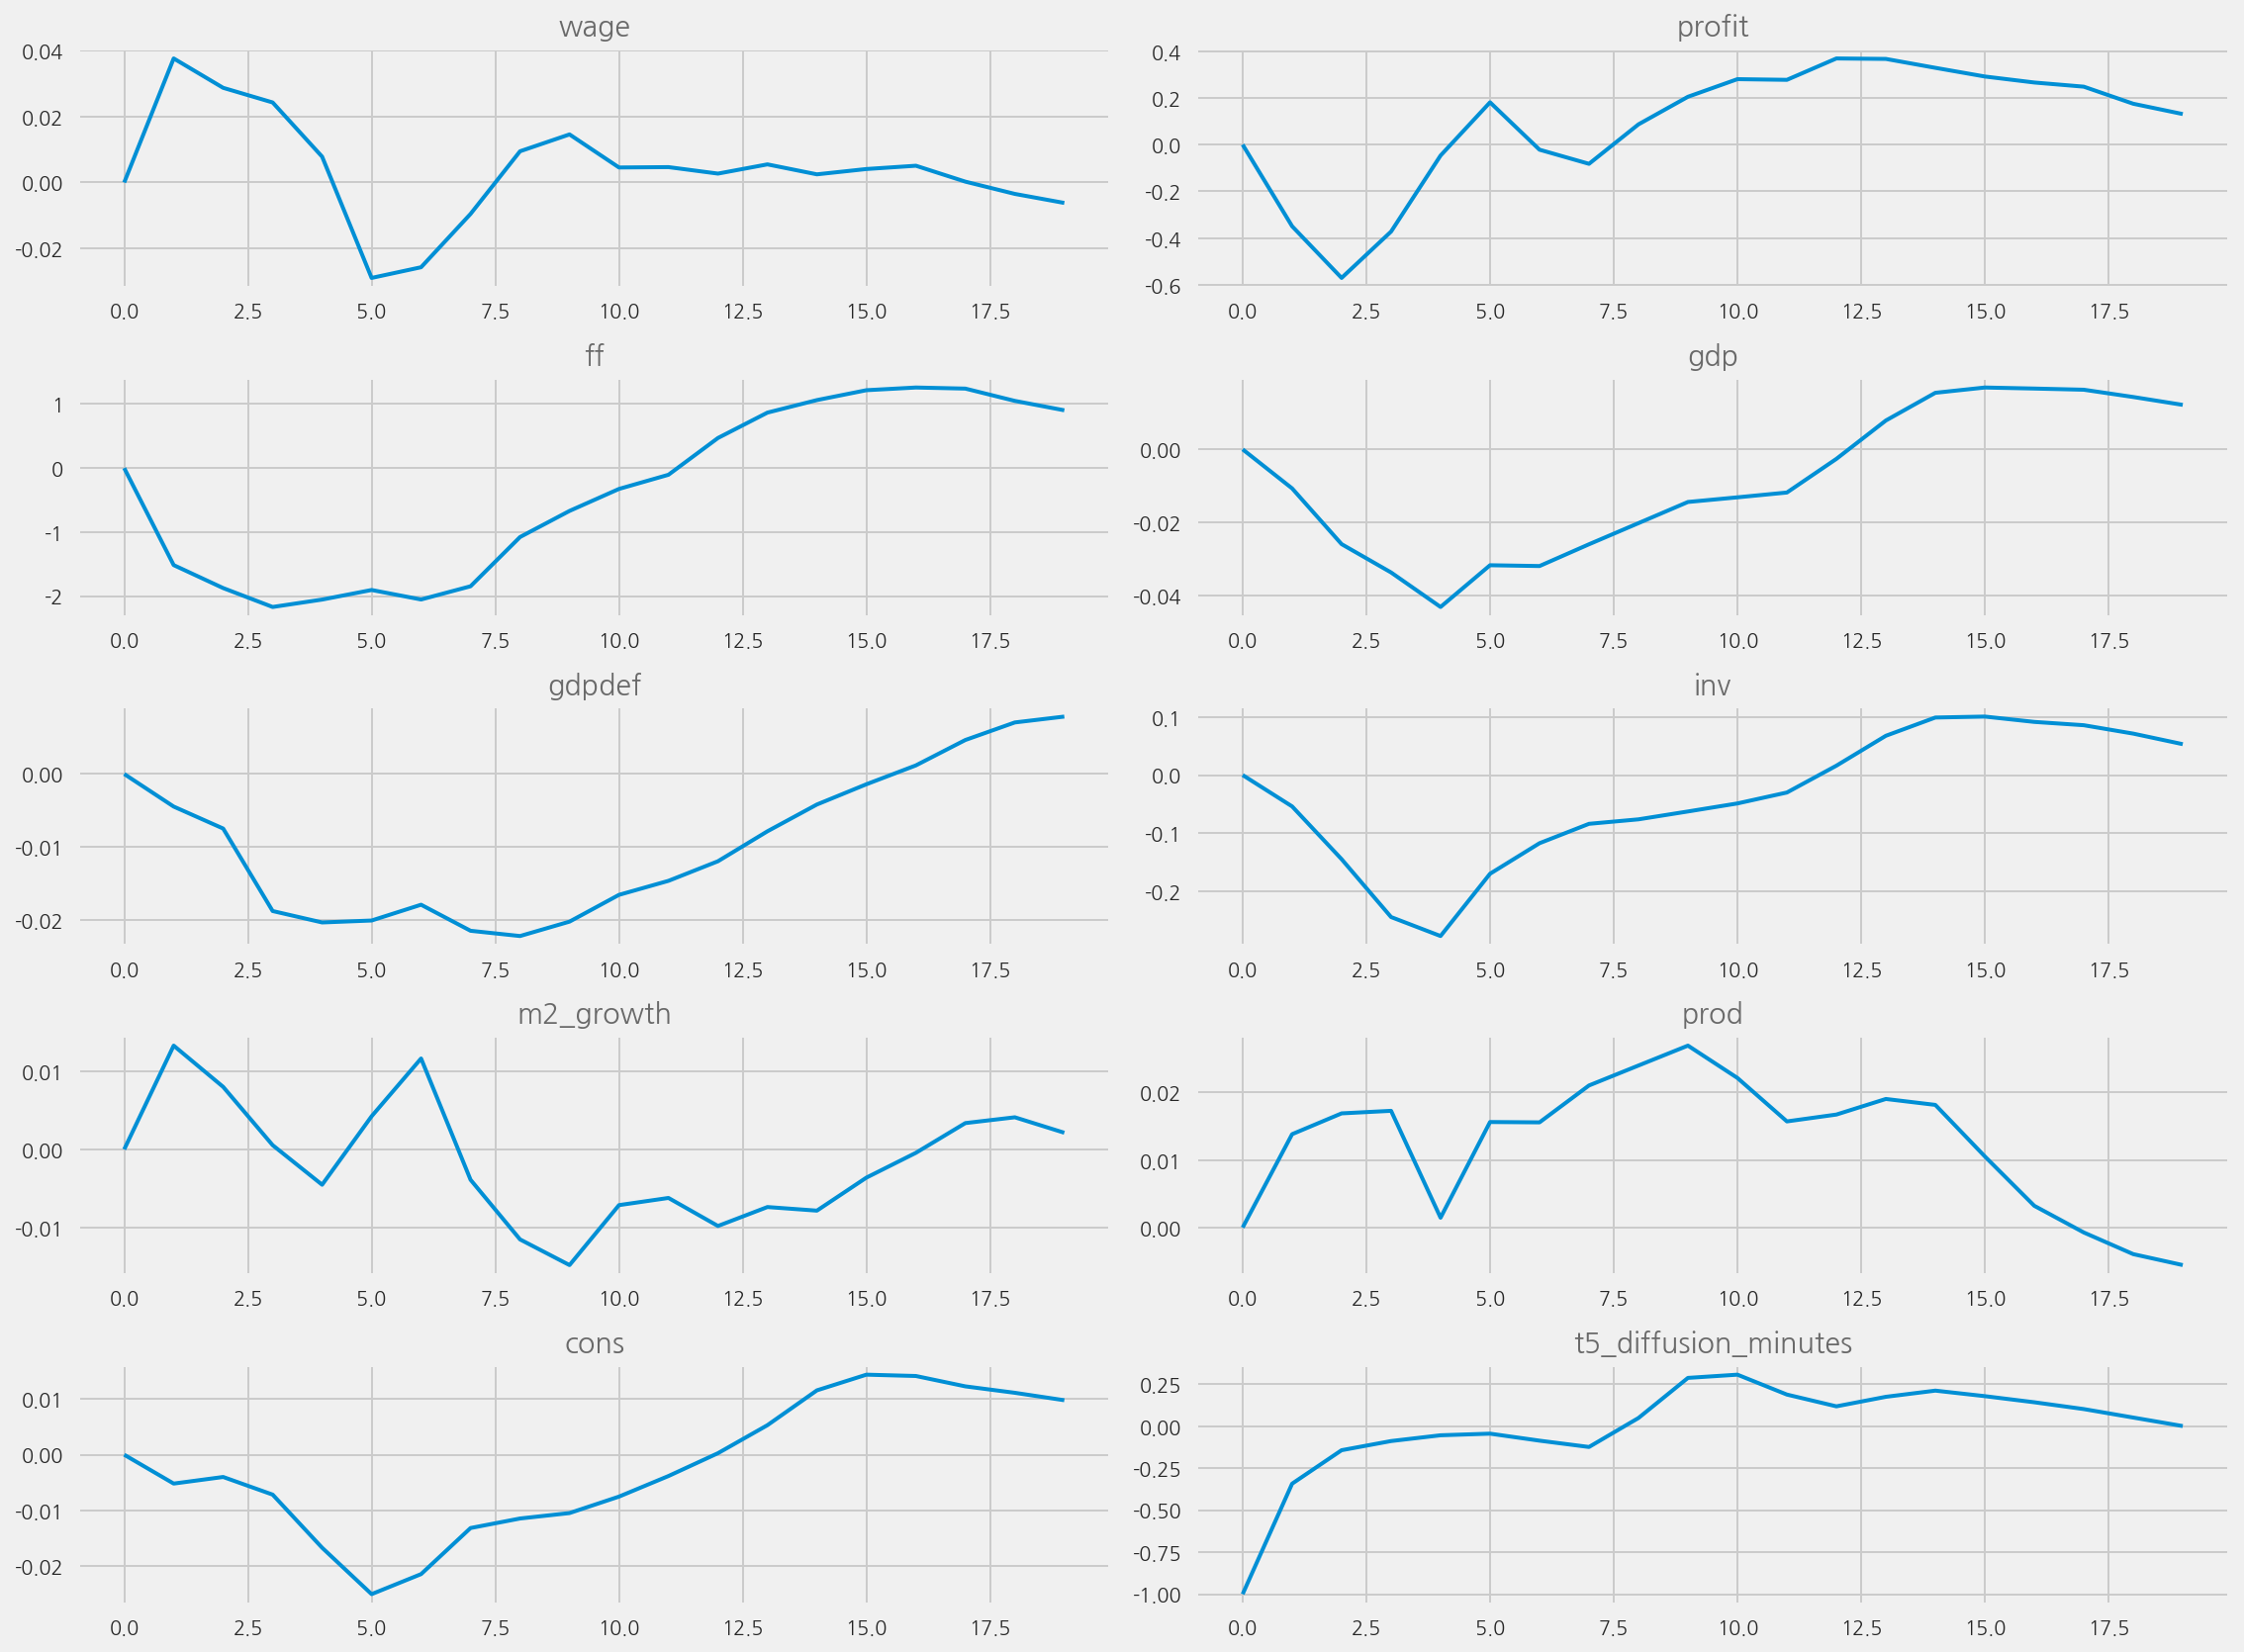

In [42]:
fomc.plot_irf(irfs, tone_cols[0])